In [73]:
library(latex2exp)
library(igraph)
library(ggplot2)
library(pracma)
library(scales)

In [74]:
library(data.table)

### Question 1

In [75]:
path = "C:\\Users\\lpott\\Desktop\\UCLA\\ECENGR232E-80\\project_2\\facebook\\facebook_combined.txt.gz"
g_facebook = as.matrix(read.table(path, header = FALSE, sep = " ")) + 1
g_fb = graph_from_edgelist(g_facebook, directed = FALSE)

png 
  3

png 
  2

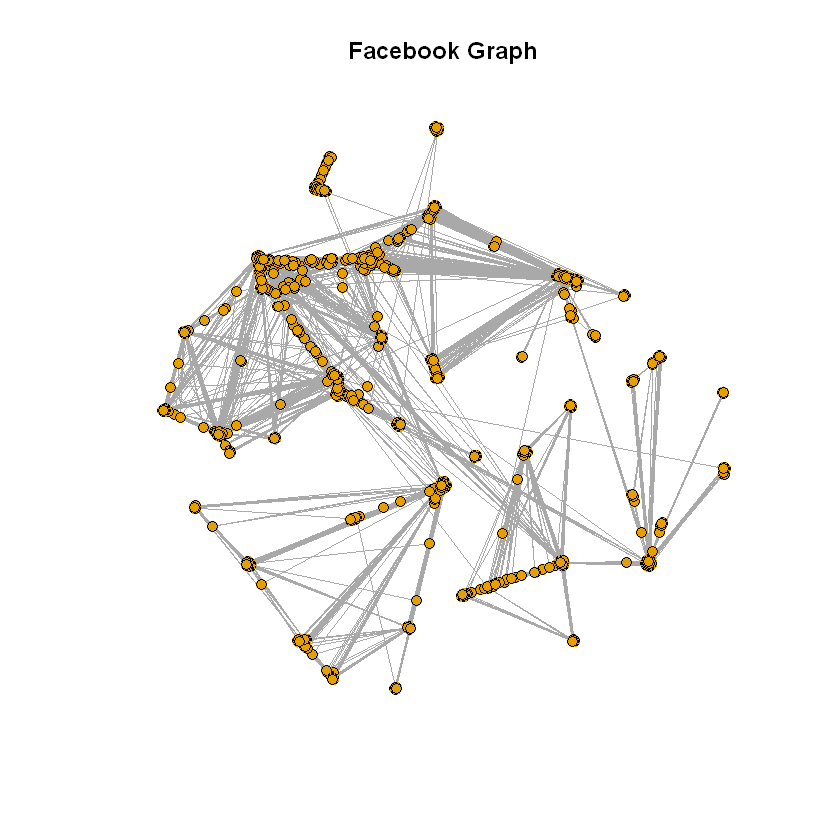

In [4]:
plot(g_fb,
     vertex.size=4,
     edge.width=.1,
     margin=c(0,0,0,0),
     main="Facebook Graph",
     vertex.label=NA)

dev.copy(png,'images\\question1.png')
dev.off()

### Question 1.1

In [76]:
N_edges = ecount(g_fb)
N_nodes <- vcount(g_fb)

In [77]:
cat("Number of Nodes: ",N_nodes,"\n")
cat("Number of Edges: ",N_edges,"\n")

Number of Nodes:  4039 
Number of Edges:  88234 


### Question 1.2

In [78]:
is_conn <- is_connected(g_fb)
cat("The graph is fully connected: ",is_conn,"\n")

The graph is fully connected:  TRUE 


### Question 2

In [79]:
diam = diameter(g_fb)
cat("The graph diameter is: ",diam)

The graph diameter is:  8

### Question 3

In [80]:
deg_dist <- degree_distribution(g_fb)

In [81]:
cat("The mean degree: ",mean(degree(g_fb)),"\n")

The mean degree:  43.69101 


png 
  3

png 
  2

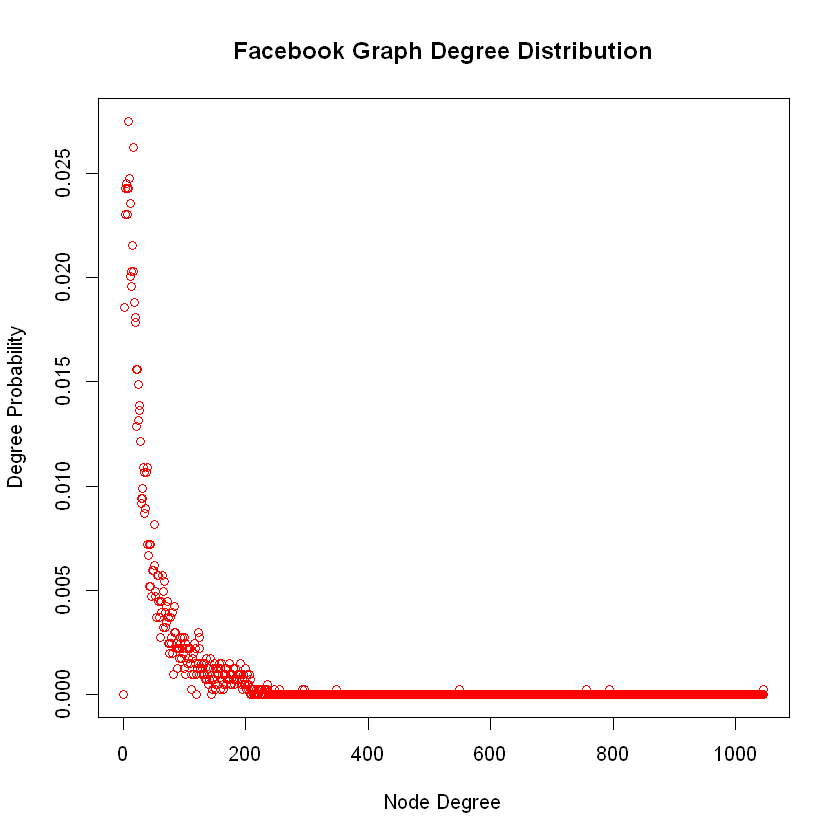

In [11]:
plot(degree_distribution(g_fb),
     col='red',
     main='Facebook Graph Degree Distribution',
     xlab="Node Degree",
     ylab="Degree Probability")

dev.copy(png,'images\\question3.png')
dev.off()

### Question 4

Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 819 rows containing non-finite values (stat_smooth)."

png 
  3

png 
  2

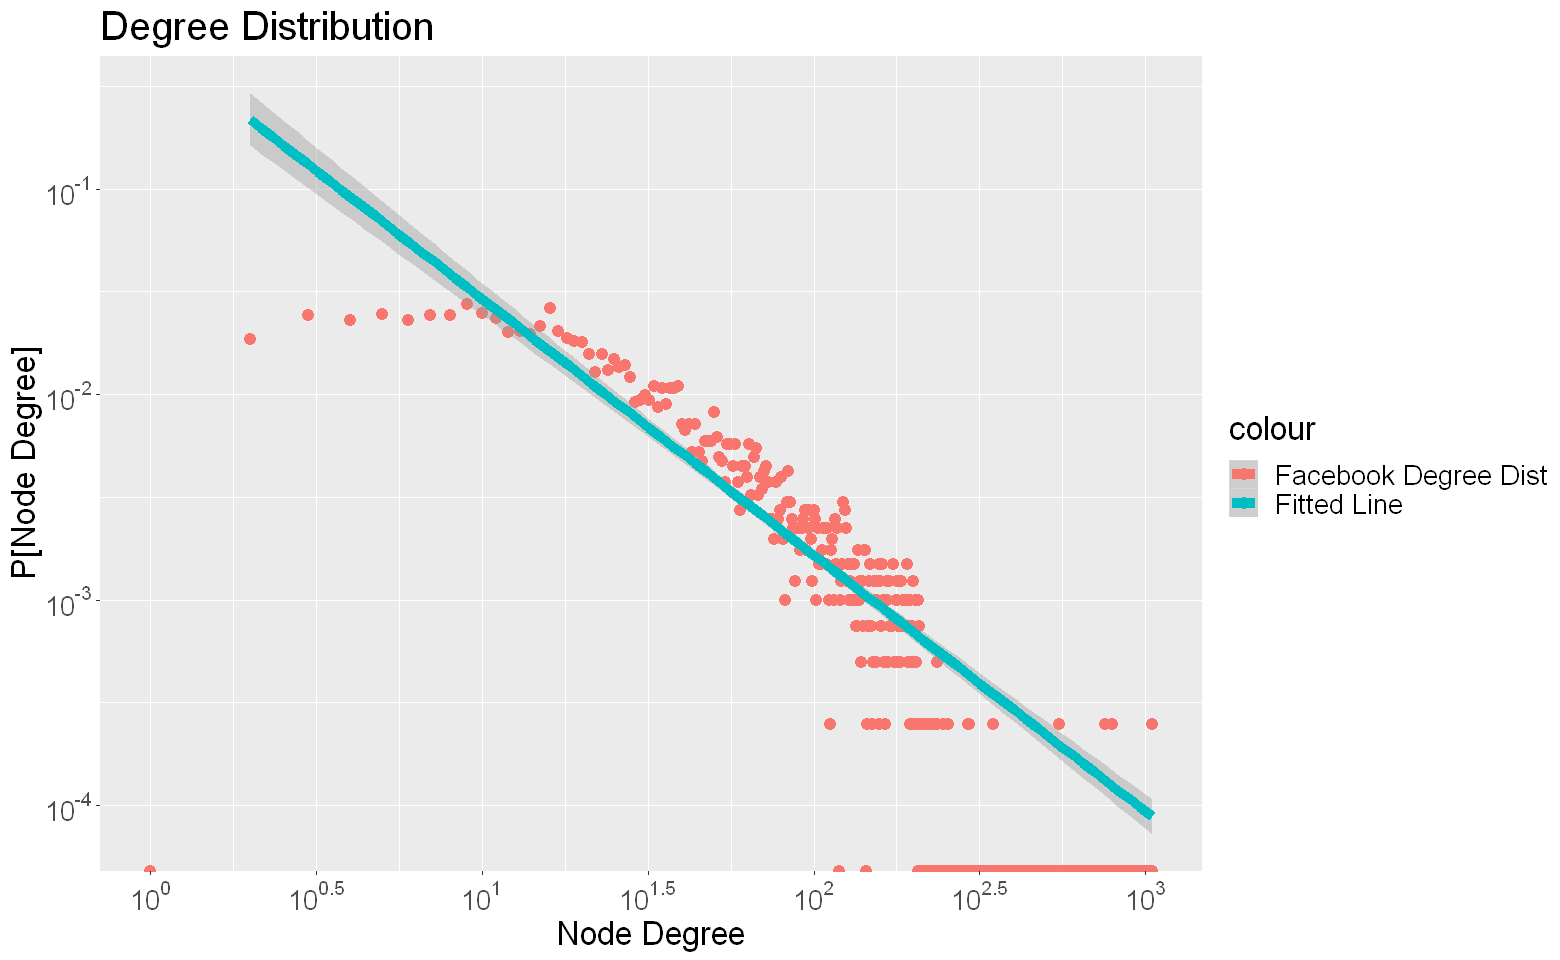

In [12]:
dg_dist <- degree_distribution(g_fb)
scatterplot <- ggplot() +
geom_point(aes(x=seq_along(dg_dist),y=dg_dist,colour='Facebook Degree Dist'),size=3) +
geom_smooth(aes(x=seq_along(dg_dist),y=dg_dist,colour='Fitted Line'),method = "lm",size=3) +
scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x),
              labels = trans_format("log10", math_format(10^.x))) +
scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
              labels = trans_format("log10", math_format(10^.x))) +
ylab("P[Node Degree]") + xlab("Node Degree") + labs(title="Degree Distribution") +
theme(text = element_text(size=20))

options(repr.plot.width=13, repr.plot.height=8)
plot(scatterplot)
dev.copy(png,'images\\question4.png',width = 800, height = 600)
dev.off()

In [13]:
df <- data.frame(x=log10(seq_along(deg_dist)),y=log10(deg_dist))
head(df)

x,y
0.0000000,-Inf
0.3010300,-1.731213
0.4771213,-1.615048
0.6020600,-1.637791
0.6989700,-1.610639
0.7781513,-1.637791


In [14]:
lm(y~x,data=df[!is.infinite(df$y),])


Call:
lm(formula = y ~ x, data = df[!is.infinite(df$y), ])

Coefficients:
(Intercept)            x  
    -0.2871      -1.2475  


### Question 5

In [15]:
g_subset <- induced_subgraph(g_fb,
                             c(1,neighbors(g_fb,1))
                            )

In [16]:
N_nodes <- vcount(g_subset)
N_edges <- ecount(g_subset)
cat("Number of nodes in subset: ",N_nodes,"\n")
cat("Number of edges in subset: ",N_edges,"\n")

Number of nodes in subset:  348 
Number of edges in subset:  2866 


In [17]:
for (i in seq_along(V(g_subset))) {
    V(g_subset)[i]$color = 'red'
}
V(g_subset)[1]$color = 'green'

png 
  3

png 
  2

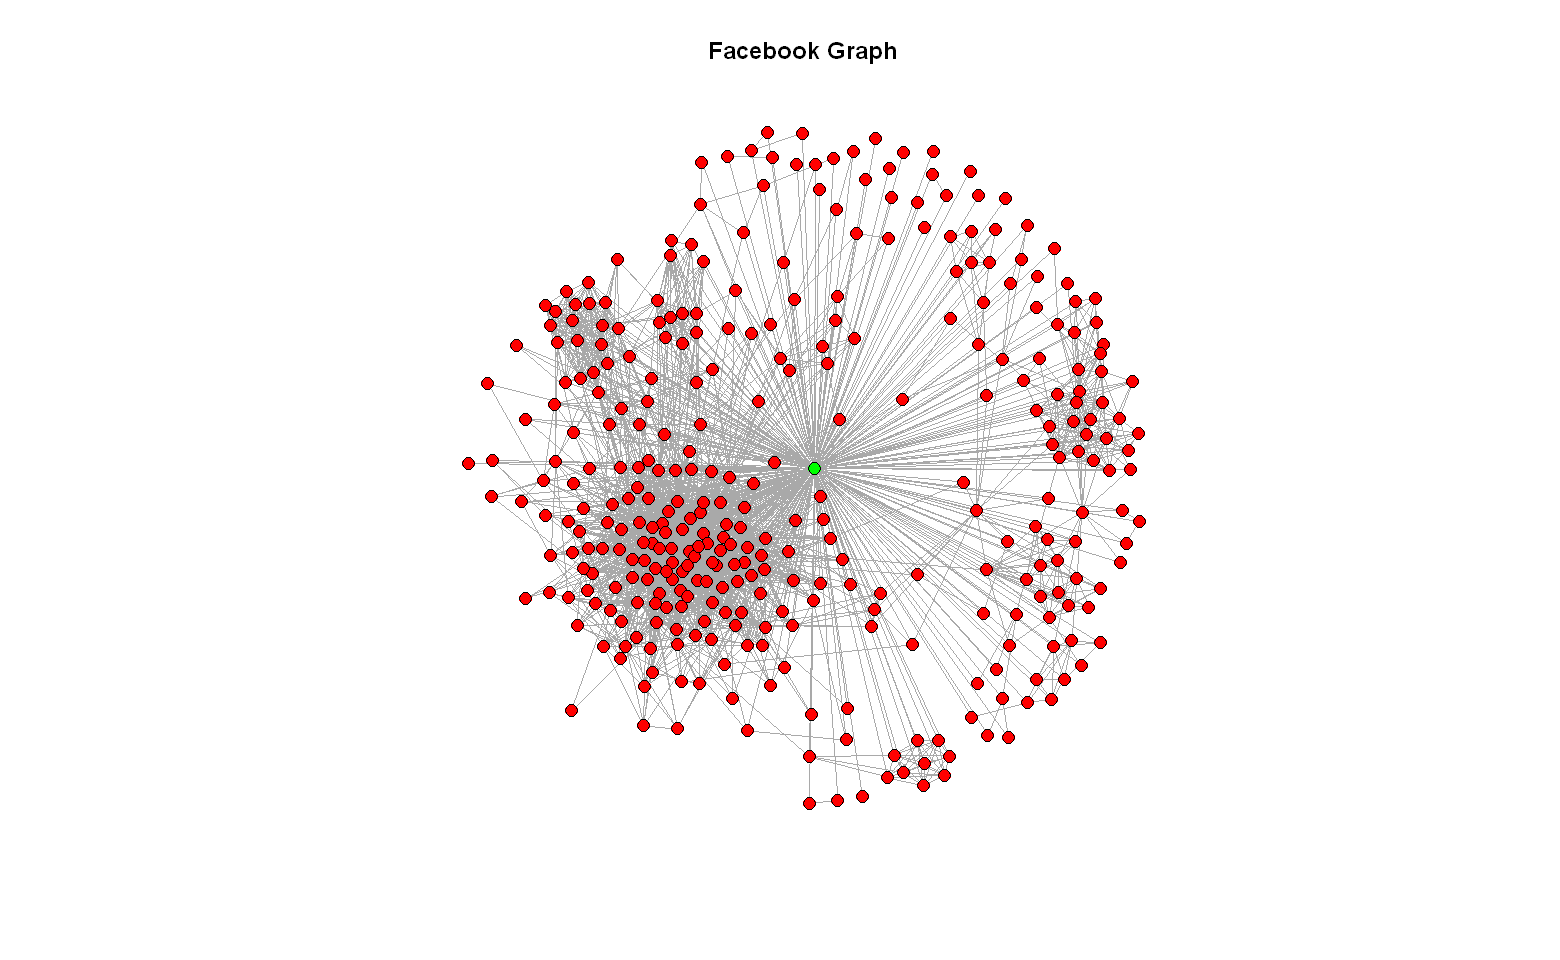

In [18]:

plot(g_subset,
     vertex.size=4,
     edge.width=.1,
     margin=c(0,0,0,0),
     main="Facebook Graph",
     vertex.label=NA)
dev.copy(png,'images\\question5.png',width = 800, height = 800)
dev.off()

### Question 6

In [19]:
diam <- diameter(g_subset)
cat("The diameter is ",diam,"\n")

The diameter is  2 


### Question 8
* This means that every node is connected through the code node, hence all shortest paths go through the core node!

In [82]:
N_corenodes <- sum(degree(g_fb) > 200)
cat("There are",N_corenodes,"core nodes\n")

There are 40 core nodes


In [87]:
cat("The average degree of the core nodes: ",mean(degree(g_fb)[degree(g_fb) > 200]))

The average degree of the core nodes:  279.375

### Question 9

In [21]:
node_ids <- c(1,108,349,484,1087)

In [22]:
##subgraphs <- make_ego_graph(g_fb, 1, nodes=V(g_fb)[node_ids])

[1] "images\\Question8_1_edgebtw_.png"
[1] "images\\Question8_1_fastgreedy_.png"


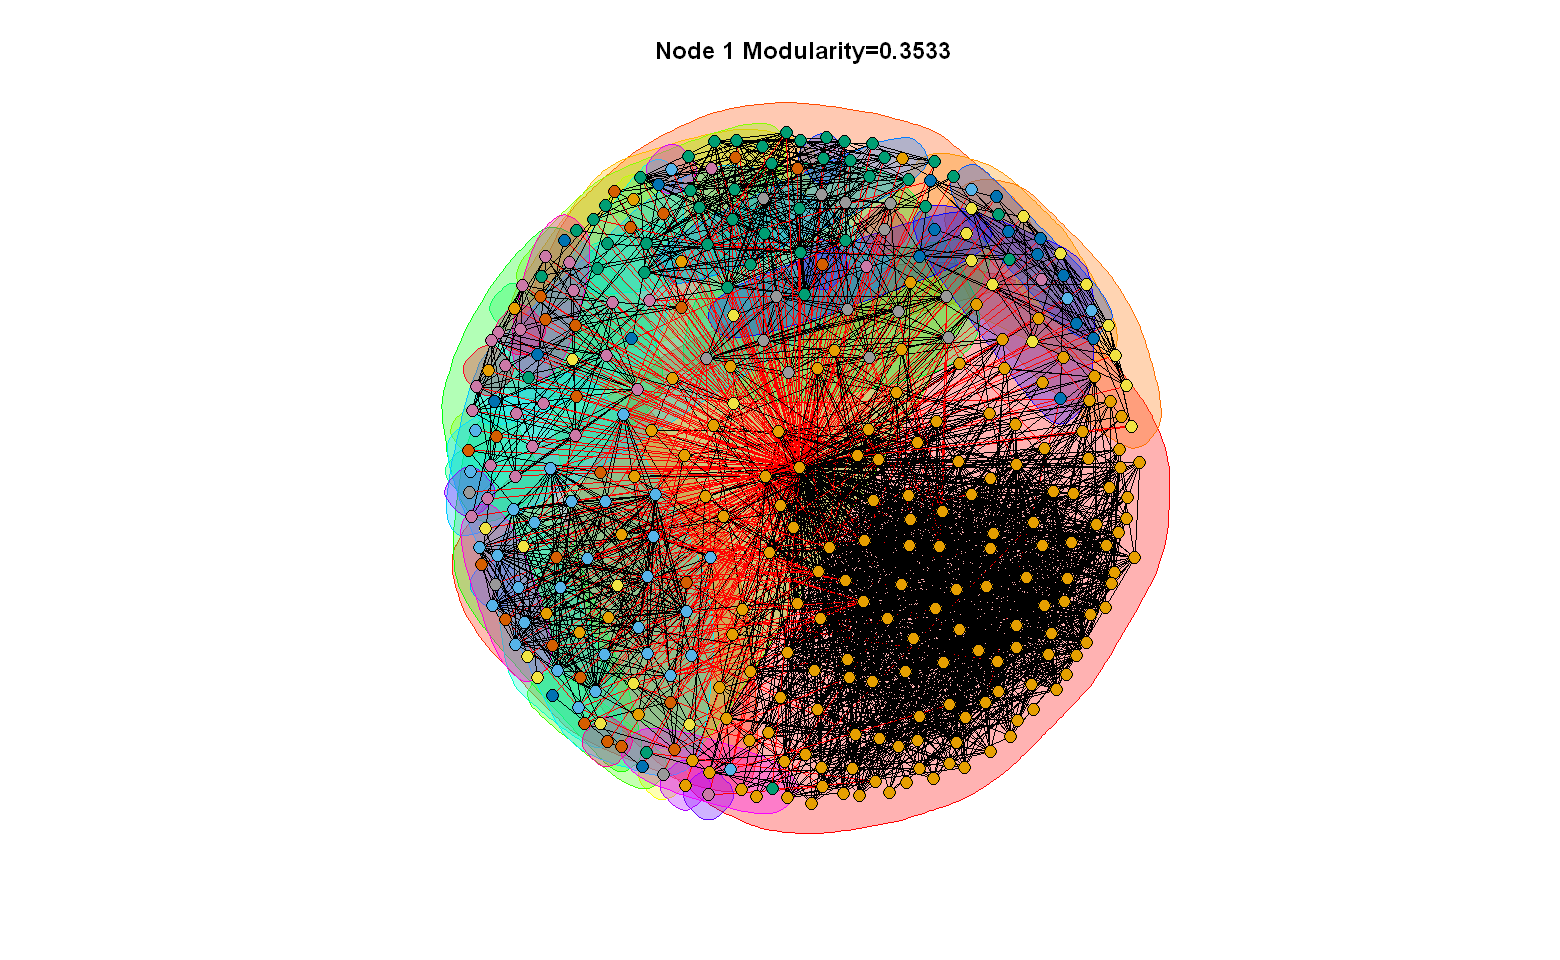

[1] "images\\Question8_1_infomap_.png"


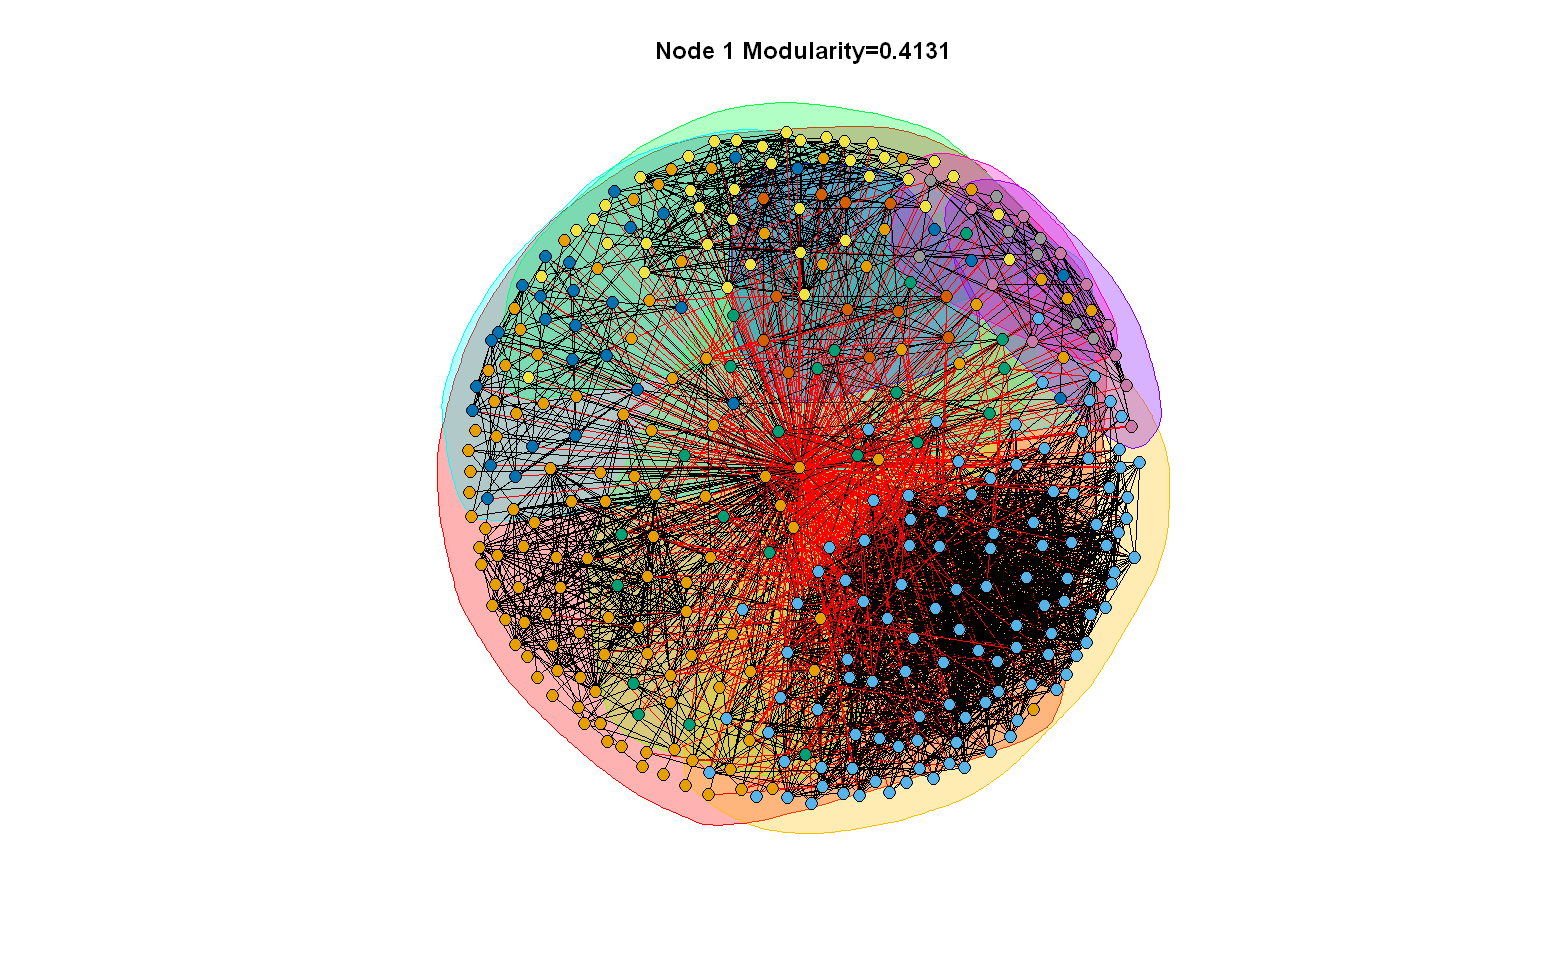

[1] "images\\Question8_108_edgebtw_.png"


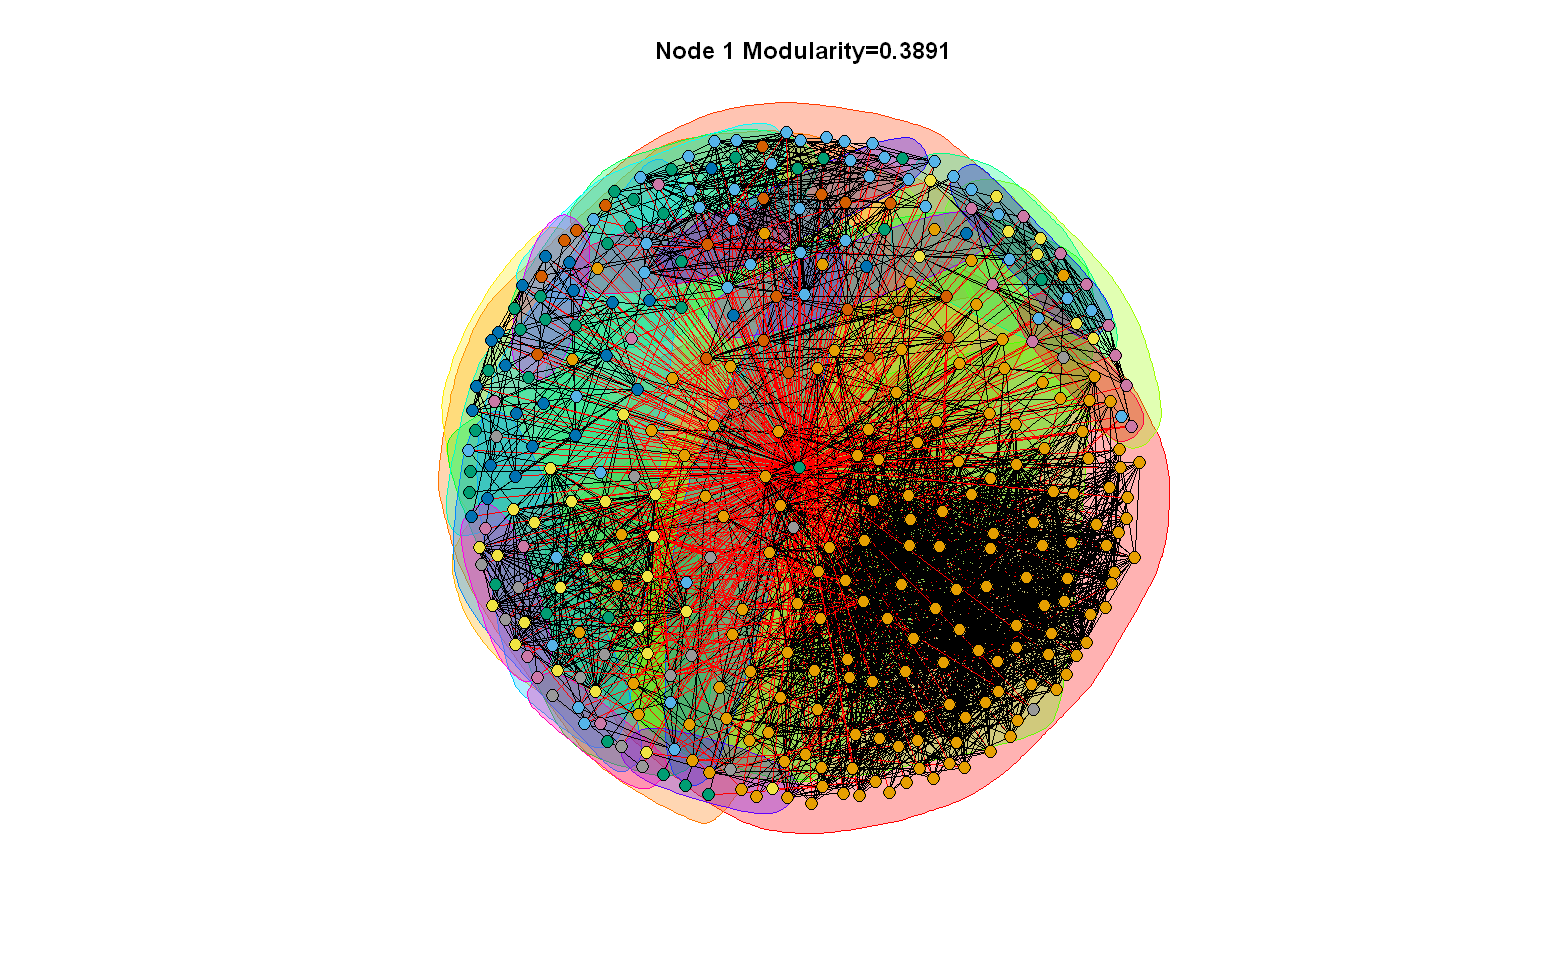

[1] "images\\Question8_108_fastgreedy_.png"


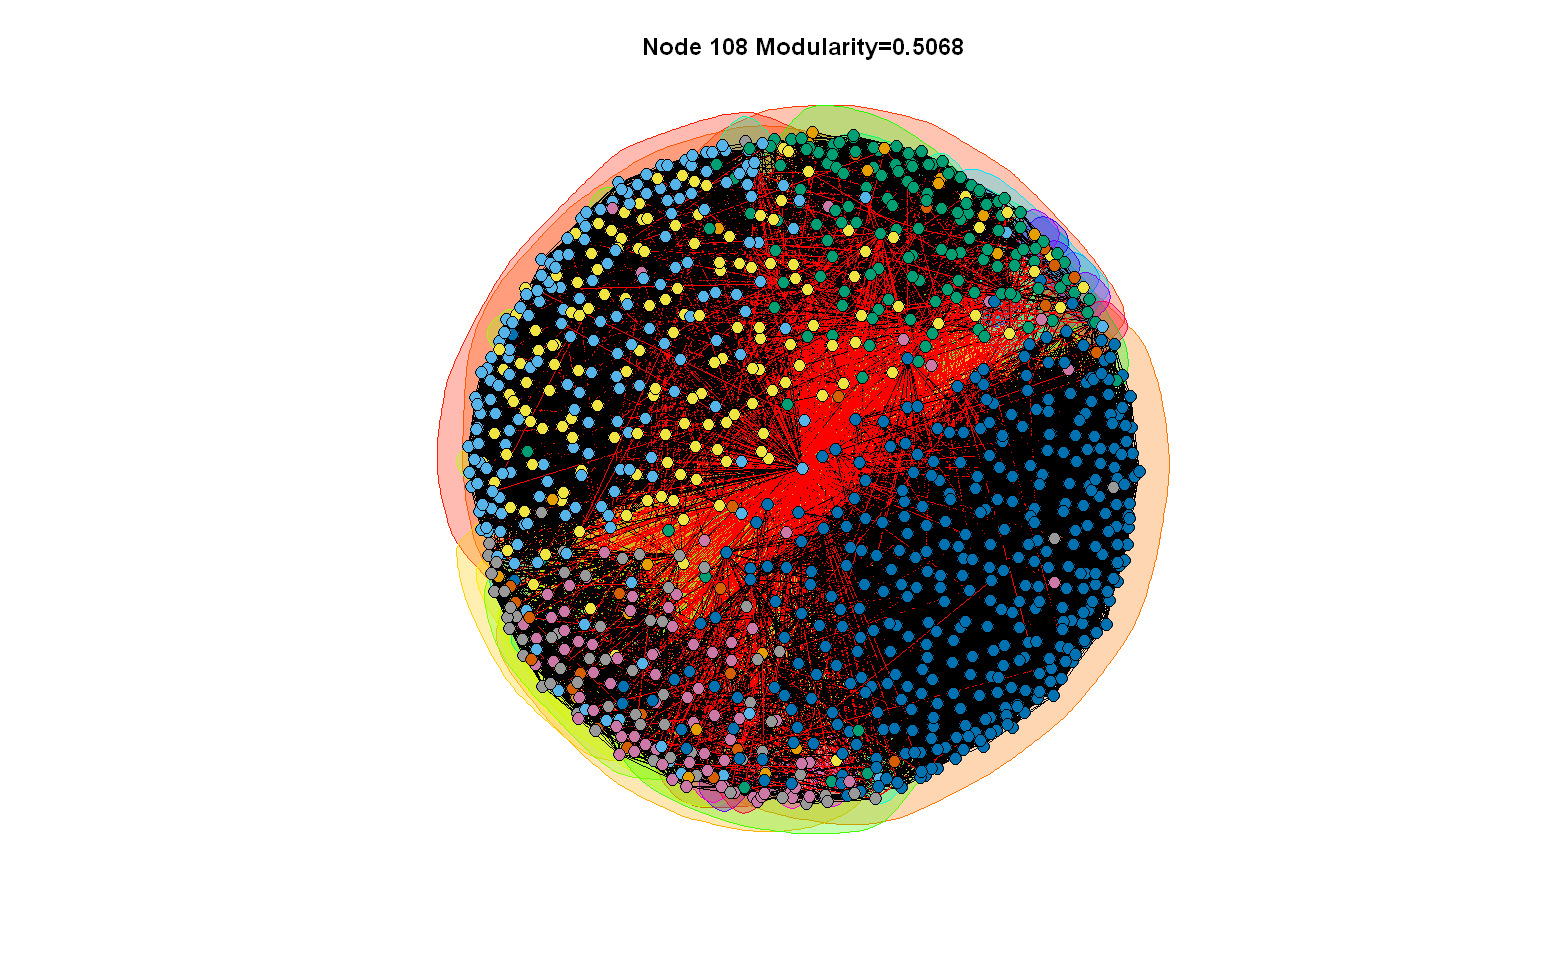

[1] "images\\Question8_108_infomap_.png"


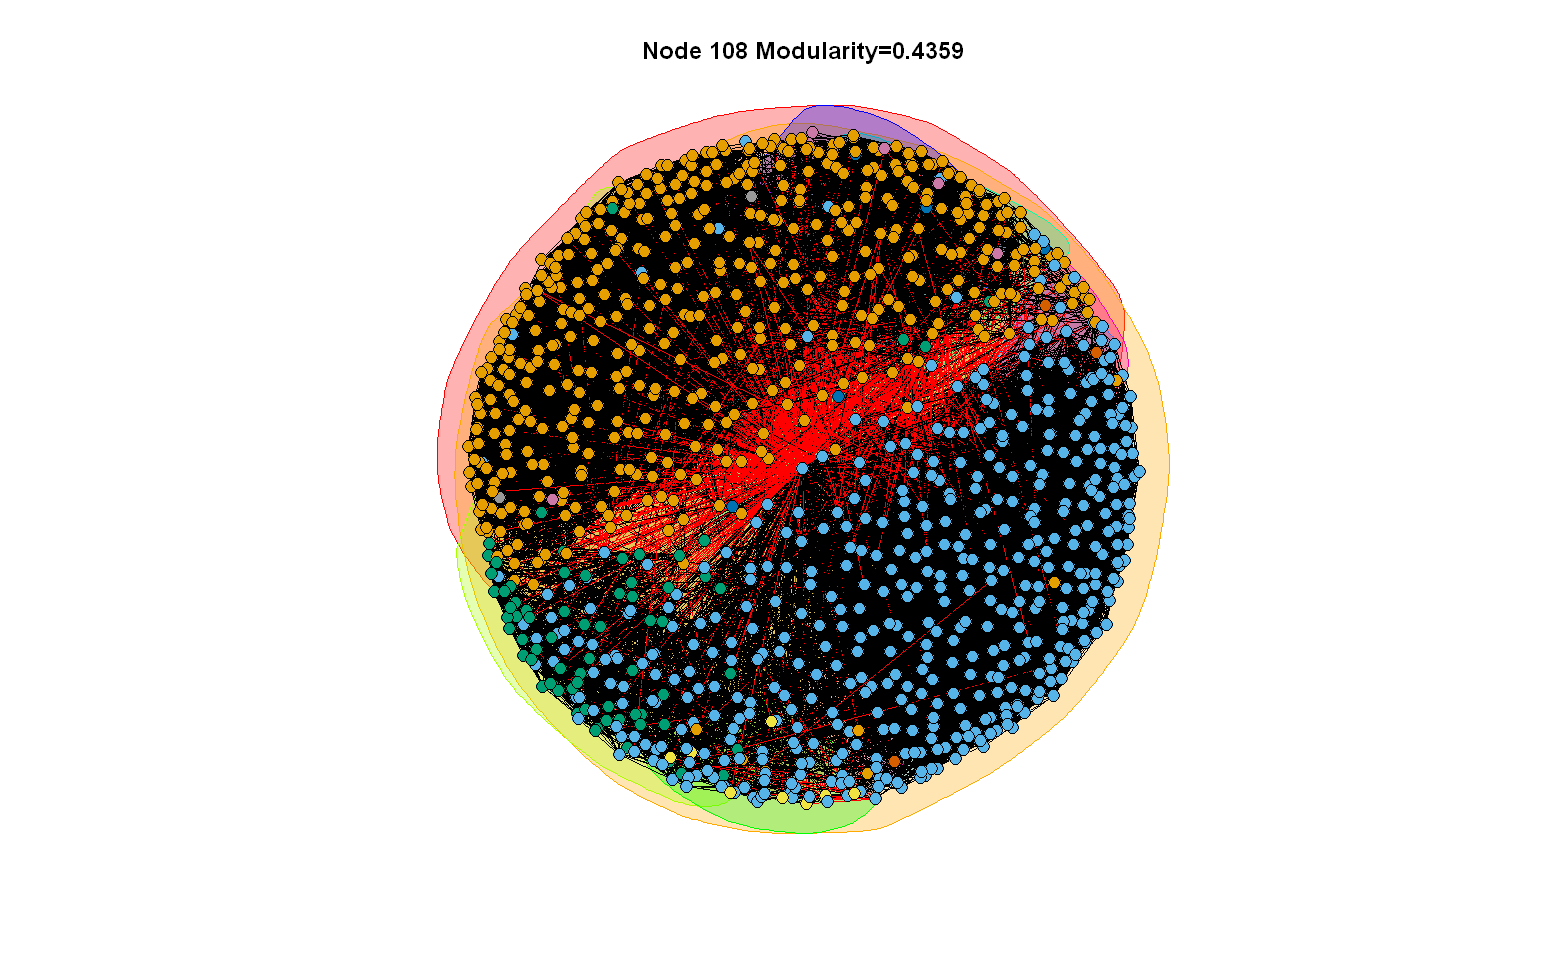

[1] "images\\Question8_349_edgebtw_.png"


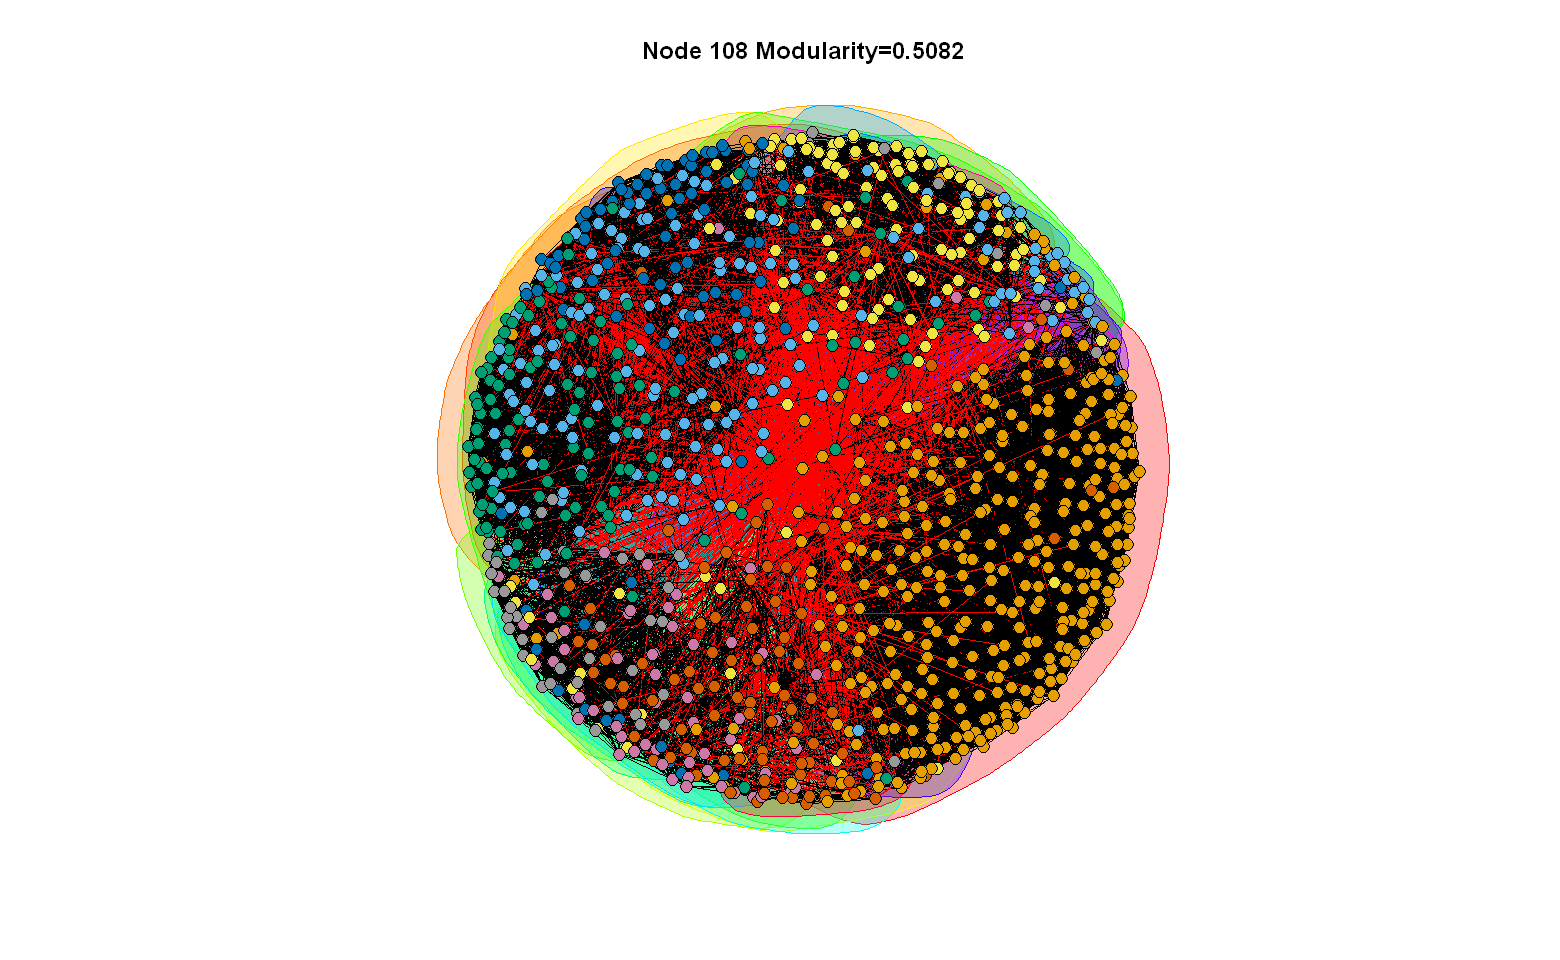

[1] "images\\Question8_349_fastgreedy_.png"


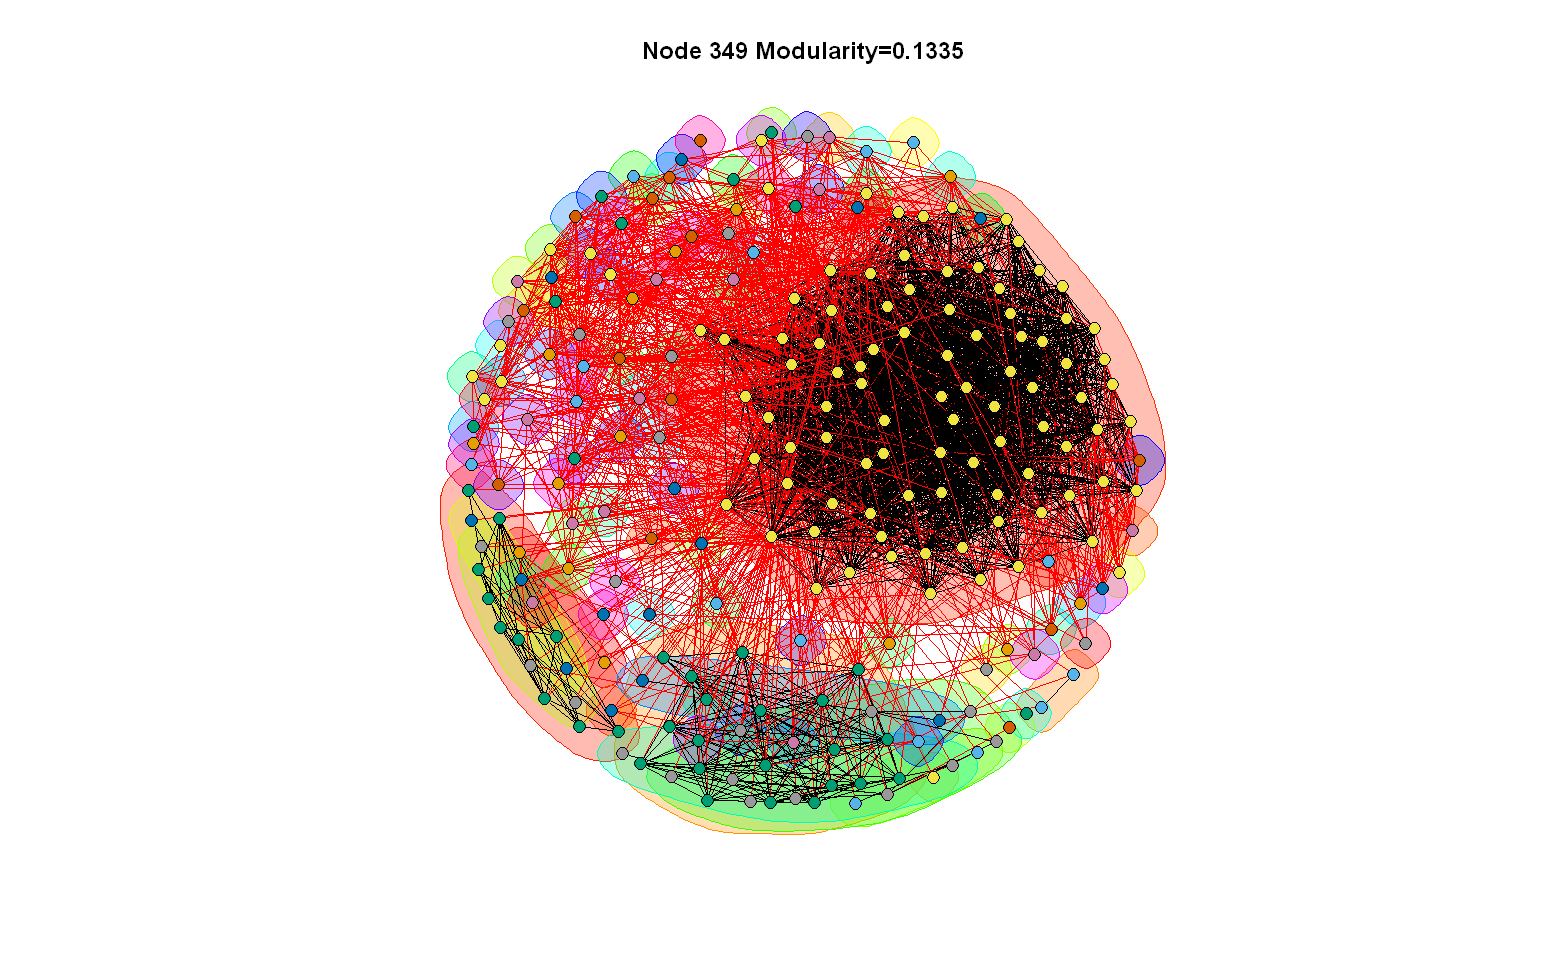

[1] "images\\Question8_349_infomap_.png"


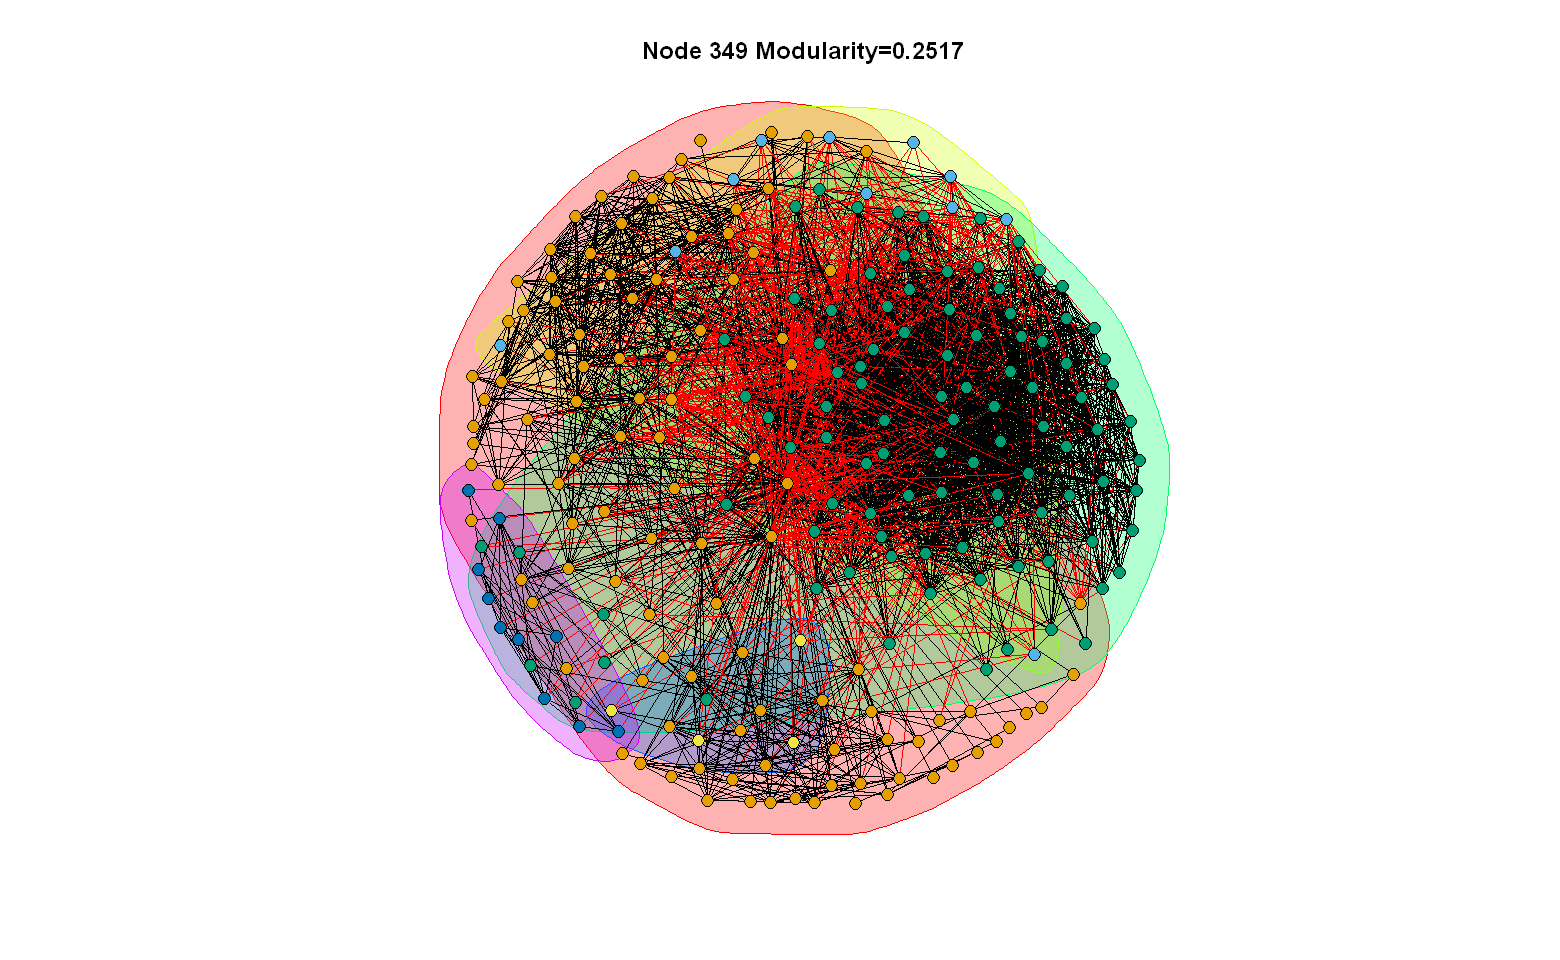

[1] "images\\Question8_484_edgebtw_.png"


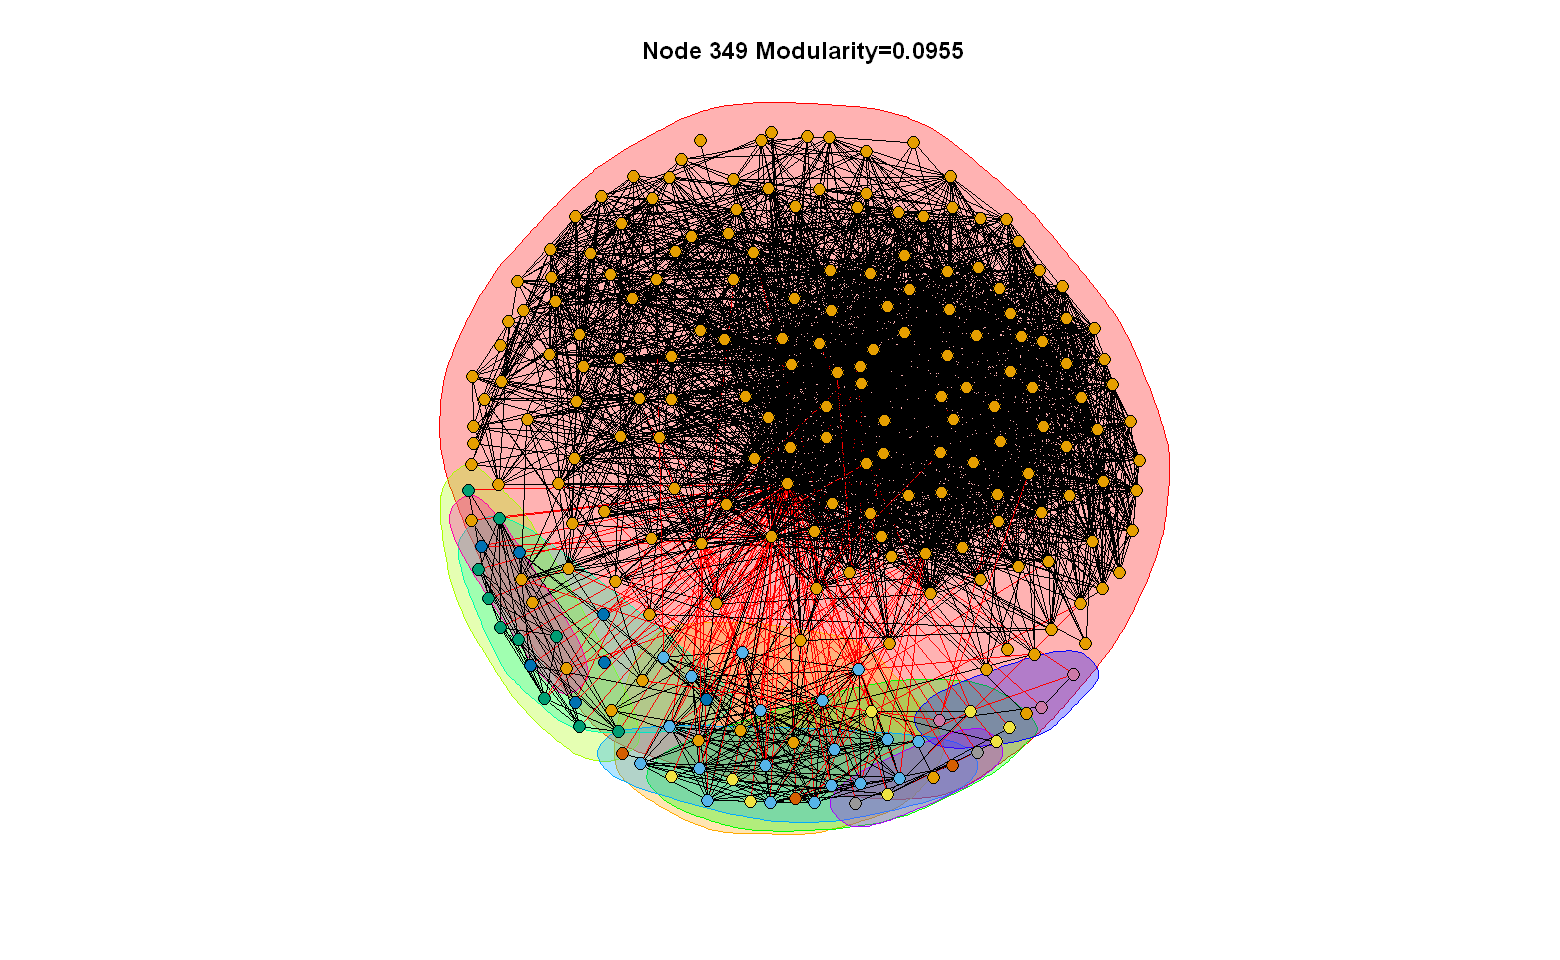

[1] "images\\Question8_484_fastgreedy_.png"


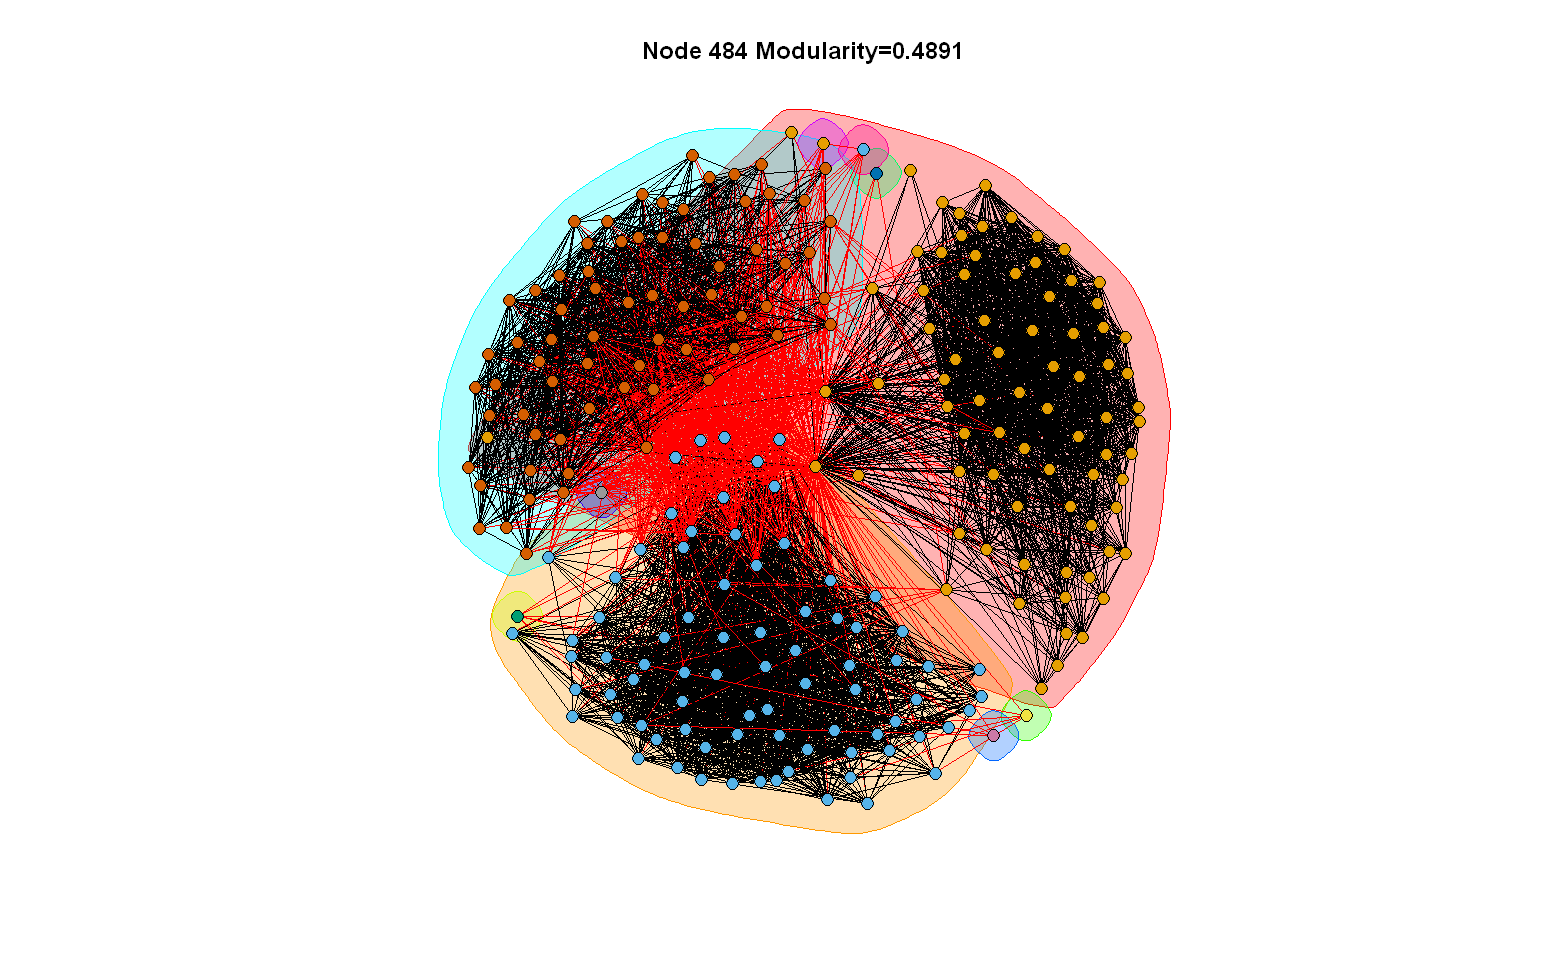

[1] "images\\Question8_484_infomap_.png"


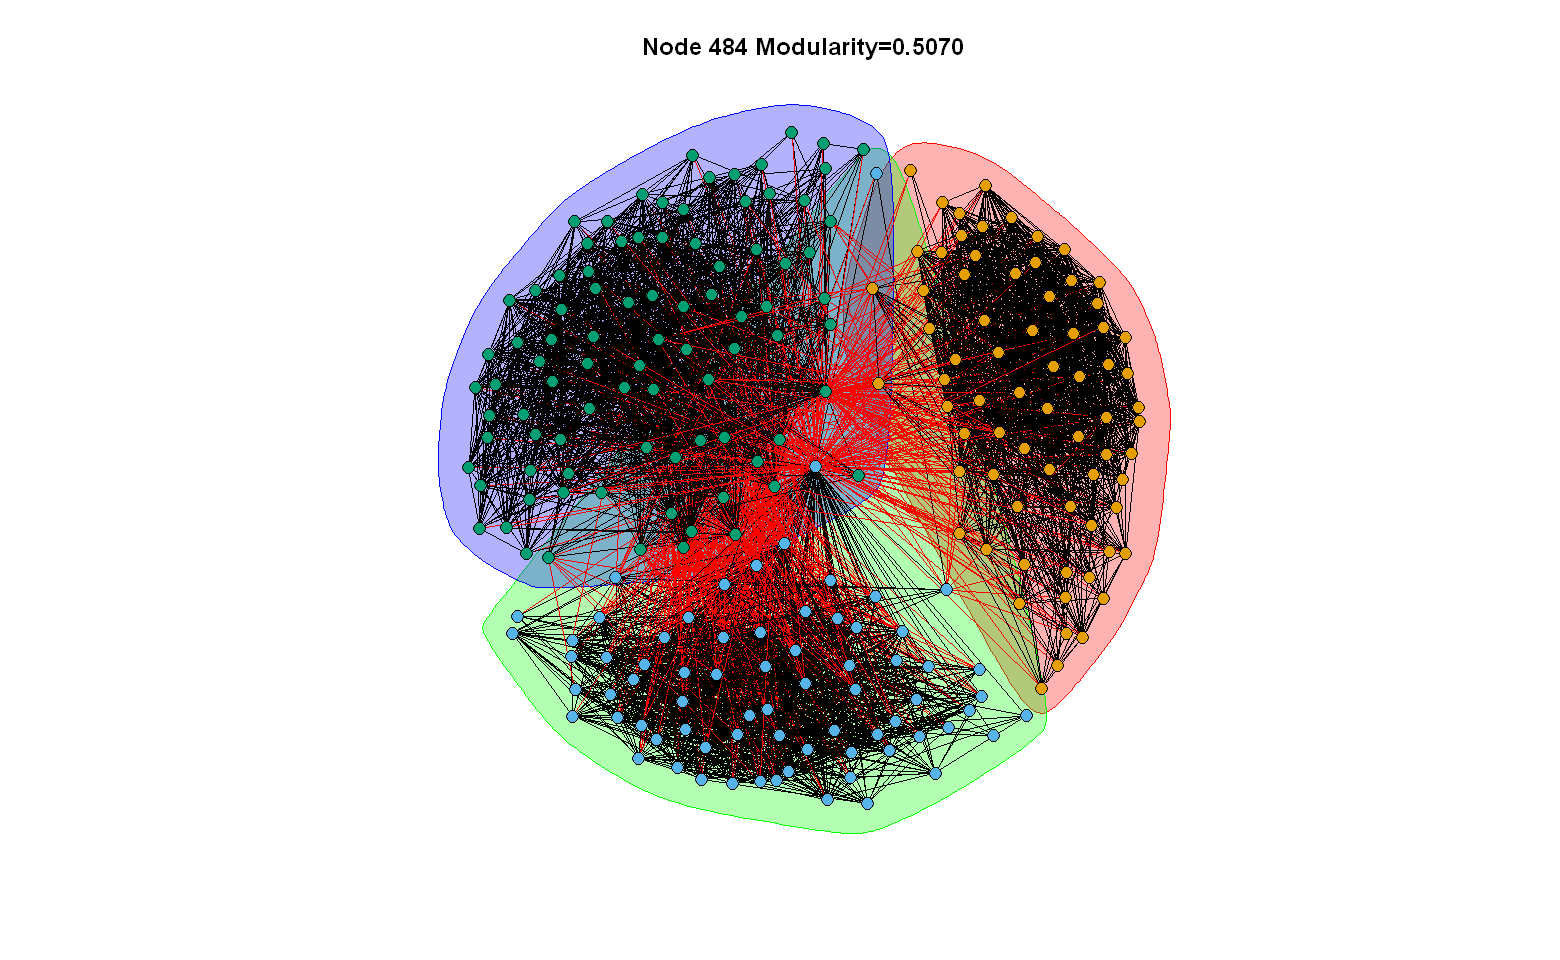

[1] "images\\Question8_1087_edgebtw_.png"


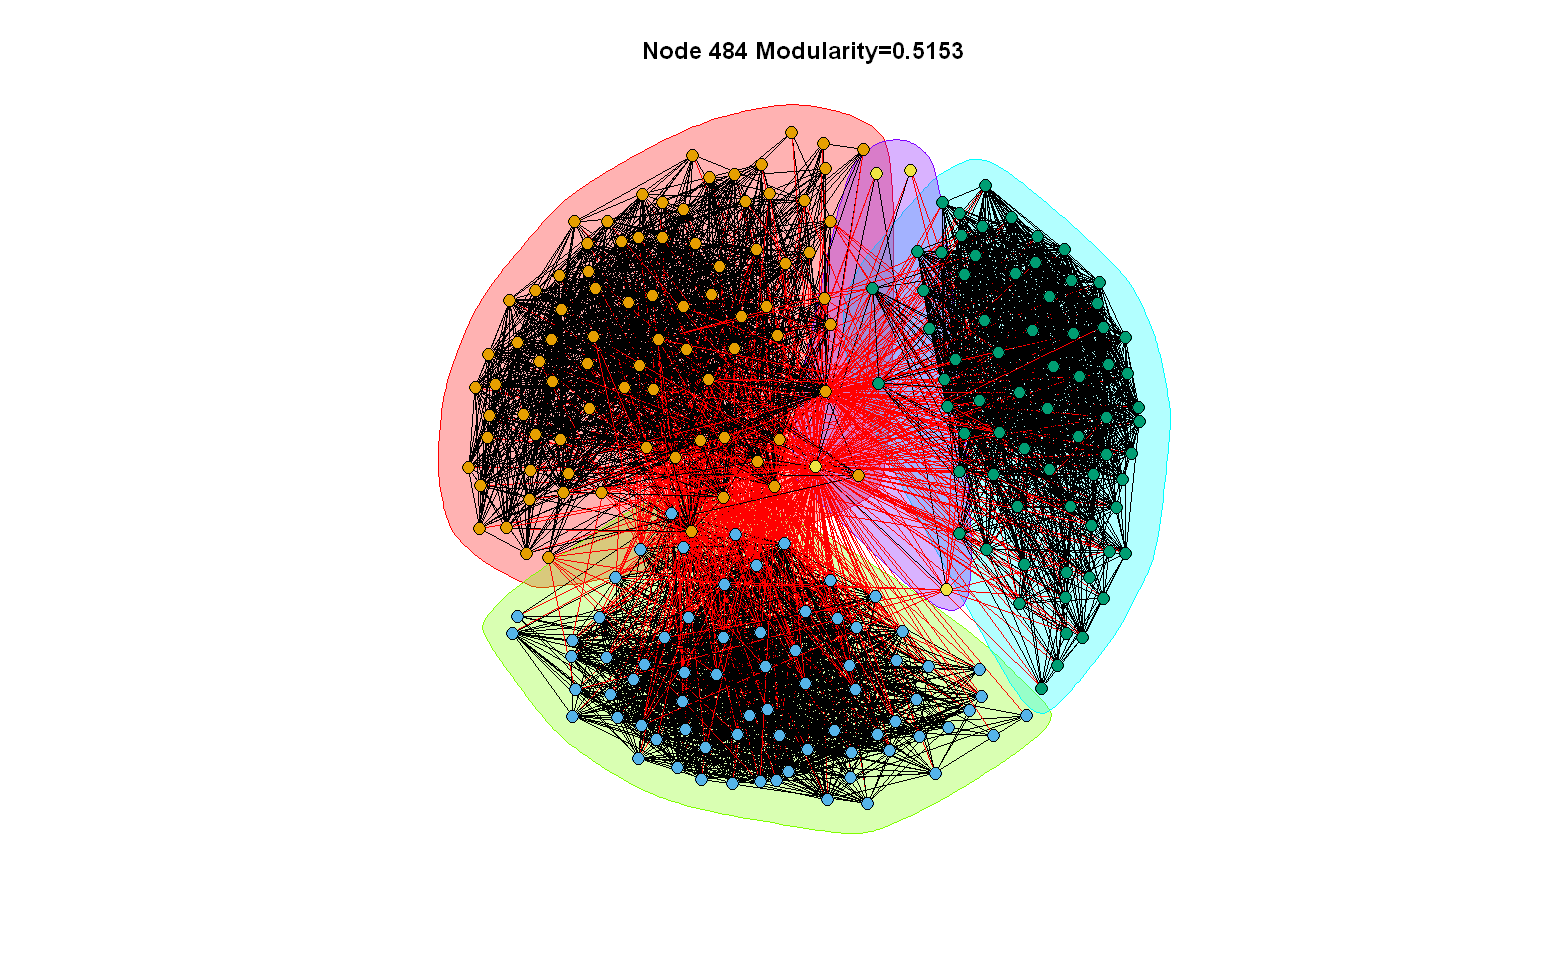

[1] "images\\Question8_1087_fastgreedy_.png"


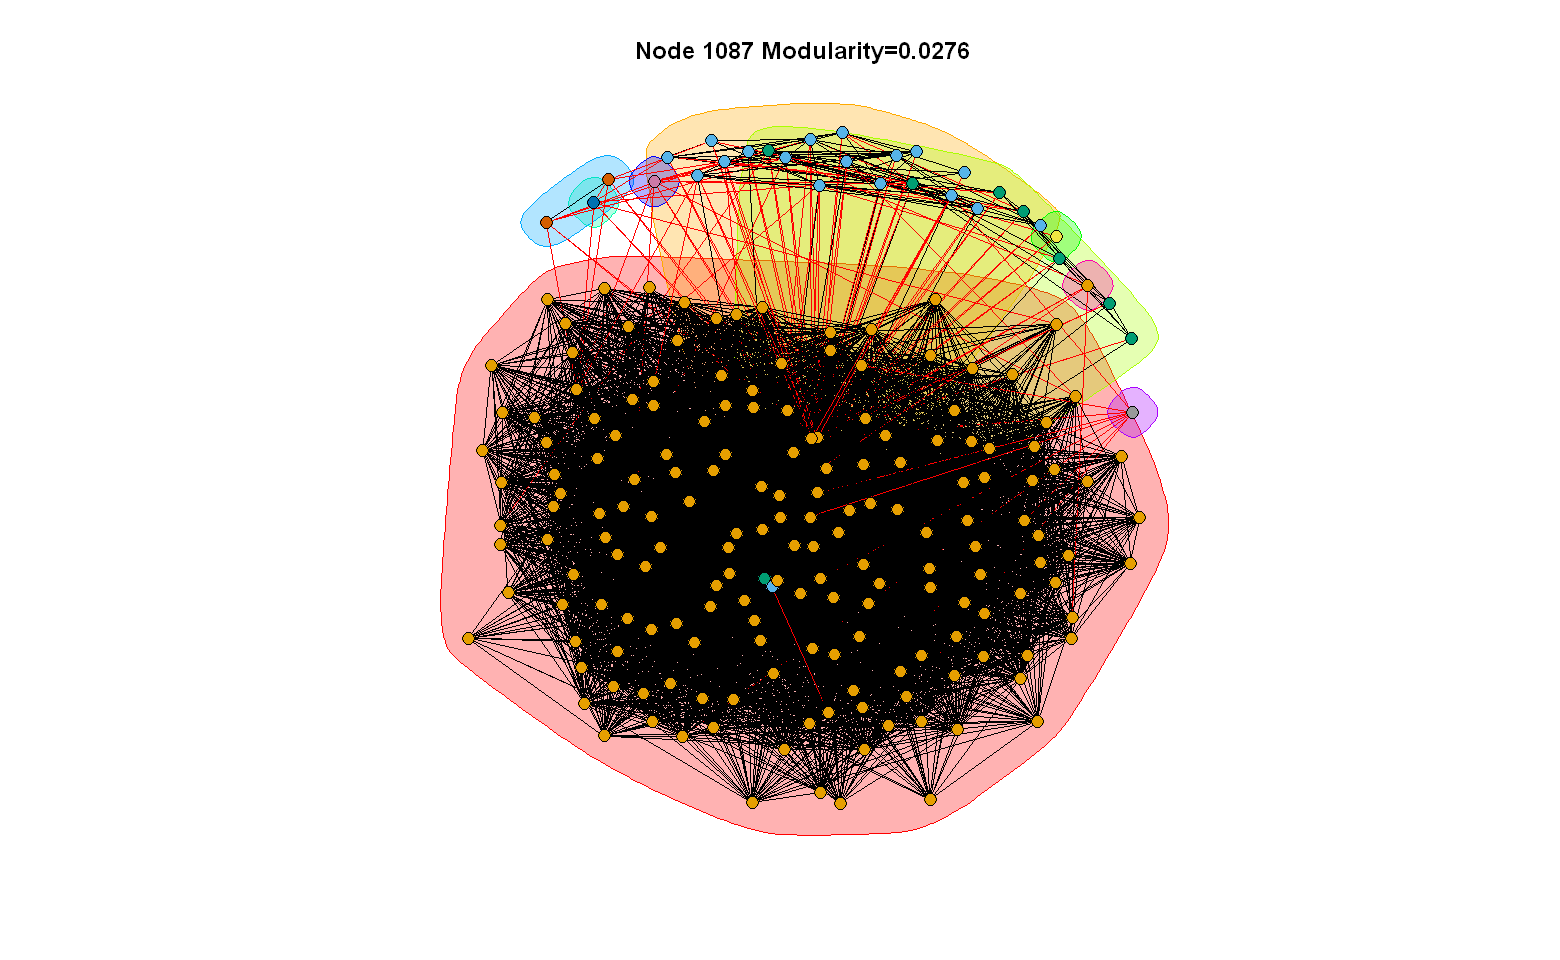

[1] "images\\Question8_1087_infomap_.png"


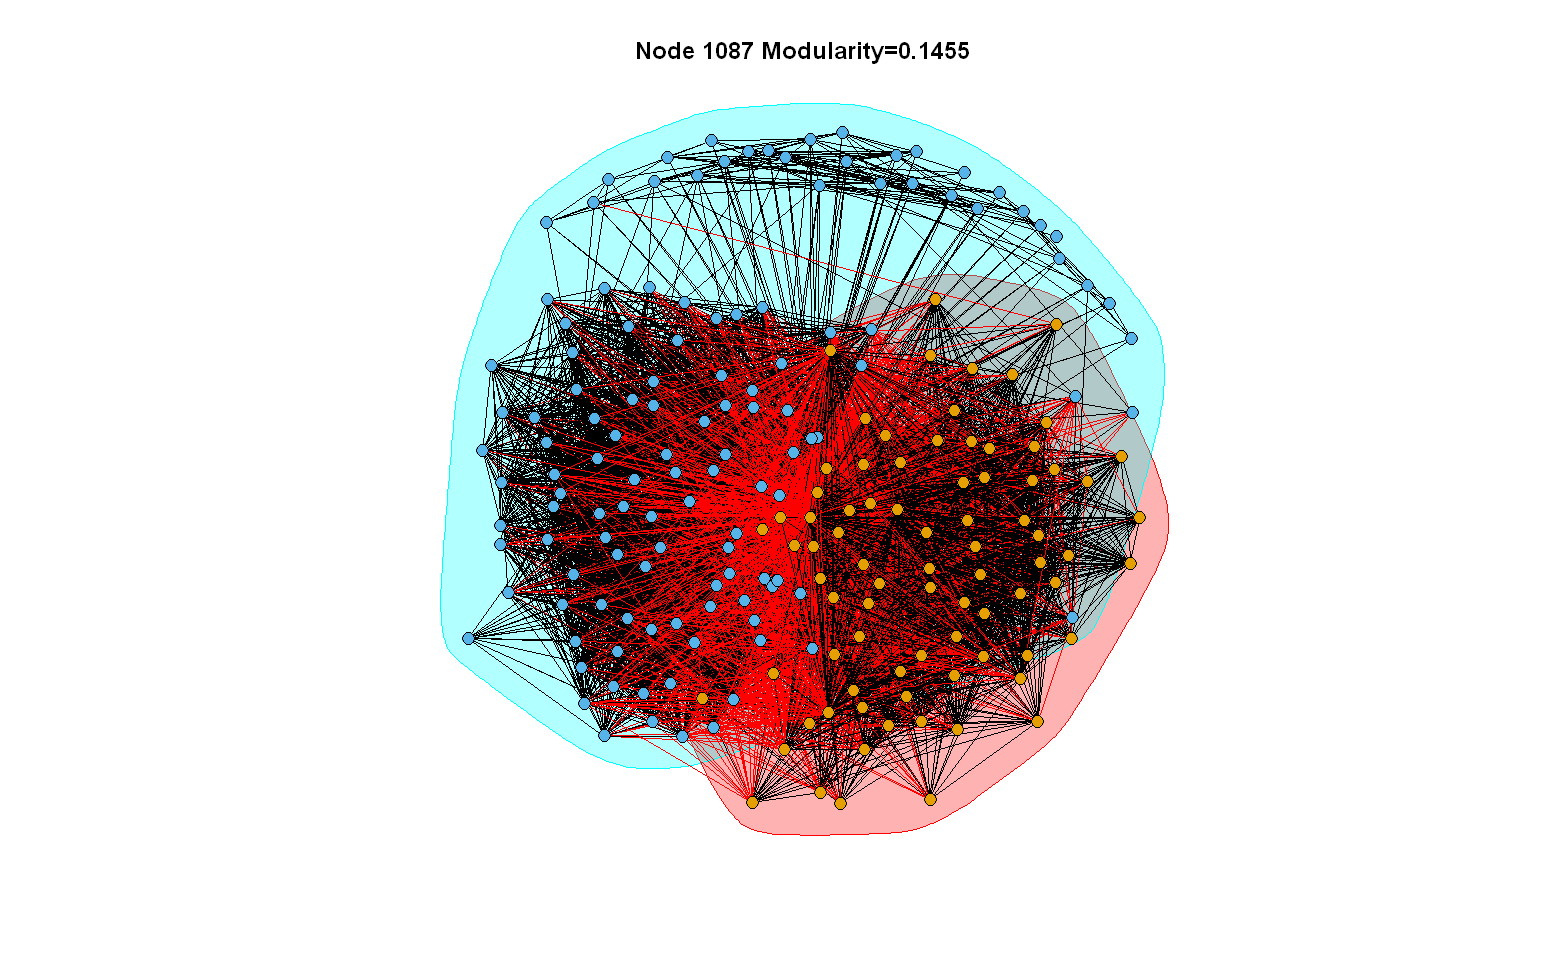

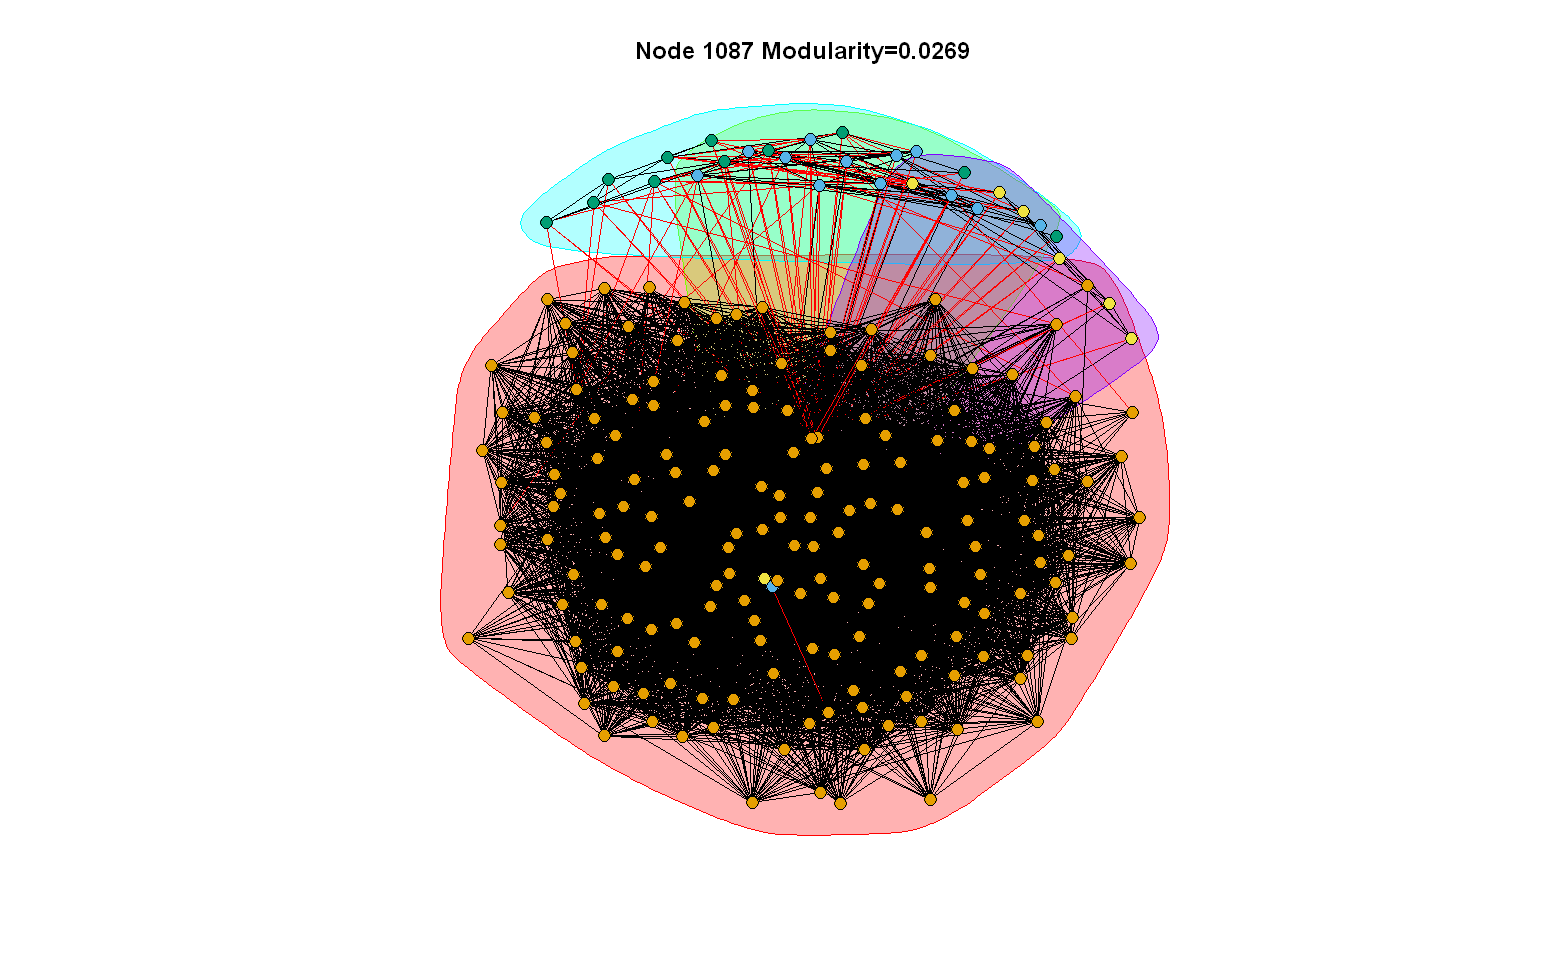

In [23]:
modularity_matrix <- matrix(nrow = length(node_ids), 
                            ncol = 3,
                           dimnames = list(node_ids,
                               c("edgebtw","fastgreedy","infomap")))
for (i in seq_along(node_ids)){
    n_id <- node_ids[i]
    subset = c(n_id,neighbors(g_fb,n_id))
    g_subset <- induced_subgraph(g_fb,
                             subset)
                            
    
    
    clusterings <- list(list("edgebtw",cluster_edge_betweenness(g_subset)),
                        list("fastgreedy",cluster_fast_greedy(g_subset)),
                        list("infomap",cluster_infomap(g_subset)))
    
    layout = layout_with_kk(g_subset)

    for (clust in clusterings){
        mod <- modularity(clust[[2]])
        modularity_matrix[i,clust[[1]]] <- mod

        filename <- paste("images\\Question8",n_id,clust[1],".png",sep="_")
        print(filename)

        plot(clust[[2]], g_subset,
             layout=layout,
             target=filename,
             vertex.label=NA,
             vertex.size=2,
             edge.width = 0.1,
             margin=c(0,0,0,0),
             main=sprintf("Node %d Modularity=%.4f",
                          n_id,mod))
        dev.copy(png,filename,width = 800, height = 800)
        dev.off()
        }
}

In [24]:
modularity_matrix

,edgebtw,fastgreedy,infomap
1,0.35330217,0.4131014,0.38911847
108,0.50675492,0.4359294,0.50824917
349,0.13352802,0.2517149,0.09546420
484,0.48909518,0.5070016,0.51527875
1087,0.02762377,0.1455315,0.02690662


### Question 10

In [25]:
node_ids <- c(1,108,349,484,1087)

In [26]:
modularity_matrix <- matrix(nrow = length(node_ids), 
                            ncol = 3,
                           dimnames = list(node_ids,
                               c("edgebtw","fastgreedy","infomap")))
for (i in seq_along(node_ids)){
    n_id <- node_ids[i]
    subset = neighbors(g_fb,n_id)
    g_subset <- induced_subgraph(g_fb,
                             subset)
                            
    layout = layout_with_kk(g_subset)

    
    clusterings <- list(list("edgebtw",cluster_edge_betweenness(g_subset)),
                        list("fastgreedy",cluster_fast_greedy(g_subset)),
                        list("infomap",cluster_infomap(g_subset)))
                        
    for (clust in clusterings){
        mod <- modularity(clust[[2]])
        modularity_matrix[i,clust[[1]]] <- mod

        filename <- paste("images\\Question9",n_id,clust[1],".png",sep="_")
        print(filename)
        
        plot(clust[[2]],
             g_subset,
             layout=layout,
             target=filename,
             vertex.label=NA,
             vertex.size=2,
             edge.width = 0.1,
             margin=c(0,0,0,0),
             main=sprintf("Node %d Modularity=%.4f",n_id,mod))
        
        dev.copy(png,filename,width = 800, height = 800)
        dev.off()
    }
}

[1] "images\\Question9_1_edgebtw_.png"
[1] "images\\Question9_1_fastgreedy_.png"
[1] "images\\Question9_1_infomap_.png"
[1] "images\\Question9_108_edgebtw_.png"
[1] "images\\Question9_108_fastgreedy_.png"
[1] "images\\Question9_108_infomap_.png"
[1] "images\\Question9_349_edgebtw_.png"
[1] "images\\Question9_349_fastgreedy_.png"
[1] "images\\Question9_349_infomap_.png"
[1] "images\\Question9_484_edgebtw_.png"
[1] "images\\Question9_484_fastgreedy_.png"
[1] "images\\Question9_484_infomap_.png"
[1] "images\\Question9_1087_edgebtw_.png"
[1] "images\\Question9_1087_fastgreedy_.png"
[1] "images\\Question9_1087_infomap_.png"


In [27]:
modularity_matrix

,edgebtw,fastgreedy,infomap
1,0.4161461,0.4418533,0.41800766
108,0.5213216,0.4581271,0.52071217
349,0.1505663,0.2456918,0.24657849
484,0.5154413,0.5342142,0.54344368
1087,0.0324953,0.1481956,0.02737159


### Question 11
* embeddedness = degree of the non-core node - 1

### Question 12

In [5]:
node_ids <- c(1,108,349,484,1087)

In [6]:
overlap_fn <- function(g,corenode,node){
    corenode_neighbors <- neighbors(g,which.max(V(g)$name==corenode))
    node_neighbors <- neighbors(g,which.max(V(g)$name==node))
    overlap <- intersection(corenode_neighbors,node_neighbors)$name
    return(overlap)
}

In [7]:
get_subgraph <- function(g,corenode){
    subset_nodes <- c(corenode, neighbors(g, corenode))
    subgraph <- induced_subgraph(g, subset_nodes)
    V(subgraph)$name = sort(subset_nodes)
    return(subgraph)
}

In [8]:
get_dispersion <- function(g,corenode){
    true_corenode <- which.max(V(g)$name==corenode)

    dist <- c()
    for (j in V(g)$name[-true_corenode]){
        true_node <- which.max(V(g)$name==j)
        overlap <- overlap_fn(g,corenode,j)
        
        g_deleted <- delete_vertices(g,c(true_node,true_corenode))

        v_idx <- V(g_deleted)[V(g_deleted)$name %in% overlap]
        dist_matrix <- distances(g_deleted,v=v_idx,to=v_idx)
        dist_matrix[is.infinite(dist_matrix)] <- NA
        dist_matrix[dist_matrix == 0] <- NA

        dist <- c(dist,sum(dist_matrix,na.rm = TRUE)/2)
    }
    
    max_disp_node <- (V(g)$name[-true_corenode])[which.max(dist)]
    
    return(list(dist,max_disp_node))
}

In [9]:
get_embeddedness <- function(g,corenode){
    embed <- degree(g)[-which.max(V(g)$name==corenode)]-1
    
    
    max_embed_node <- (V(g)[-which.max(V(g)$name==corenode)]$name)[which.max(embed)]
        
    return(list(embed,max_embed_node))
}

In [10]:
get_histogram <- function(x,filename,title,xlabel){
     p<-ggplot() + 
          geom_histogram(aes(x=x),color="black", fill="blue",binwidth=5) +
          labs(title=title) + xlab(xlabel) + ylab("Count")

   return(p)
}

[1] 1


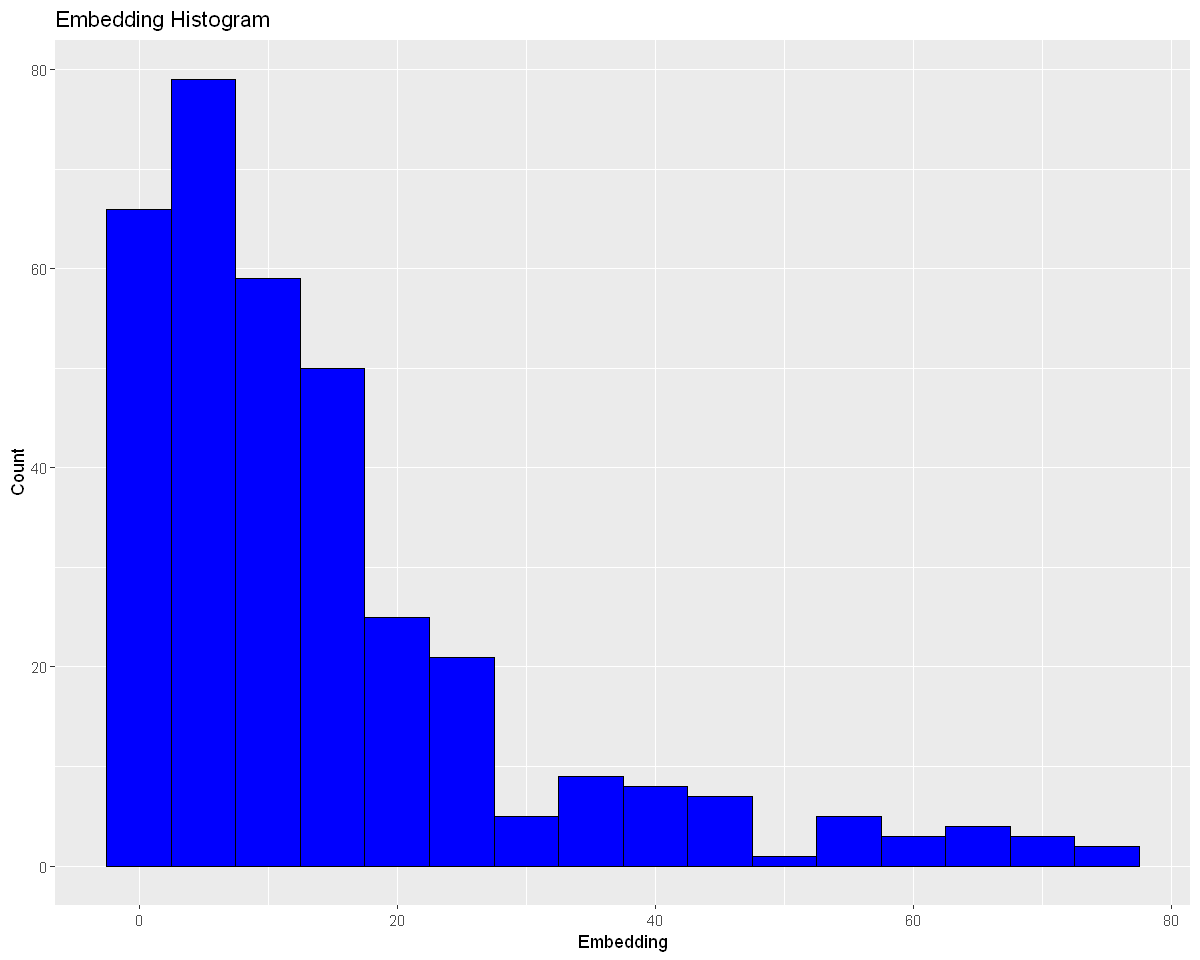

[1] 108


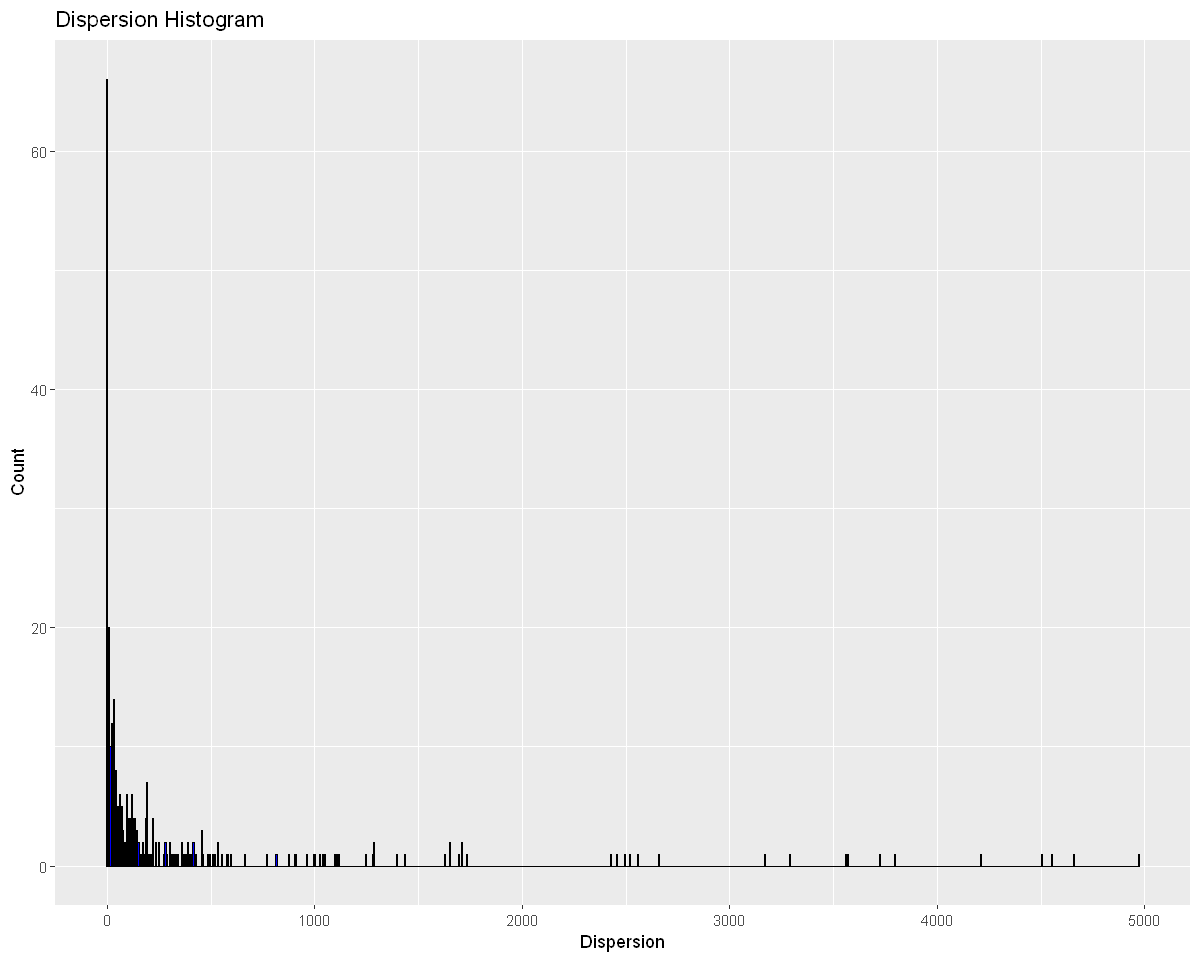

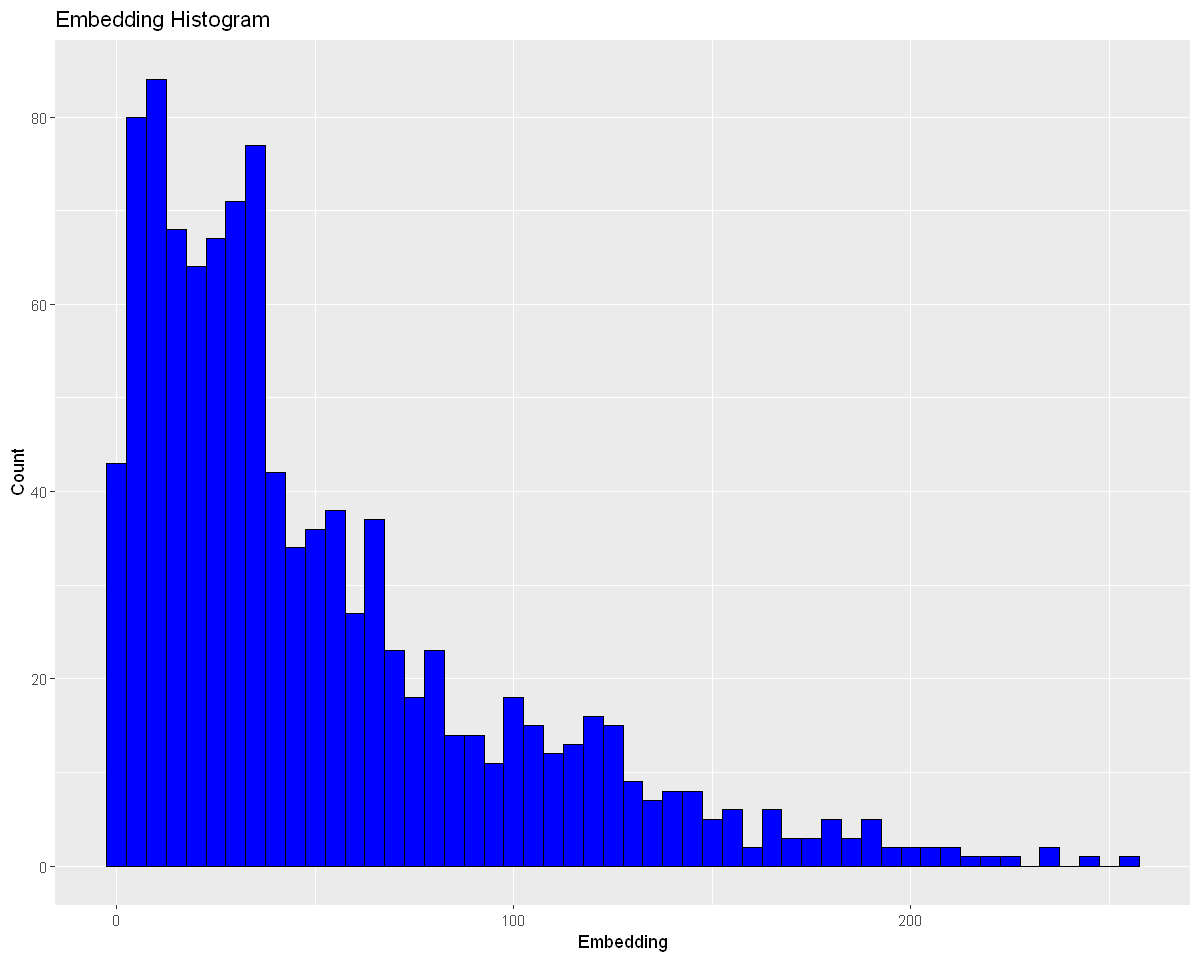

[1] 349


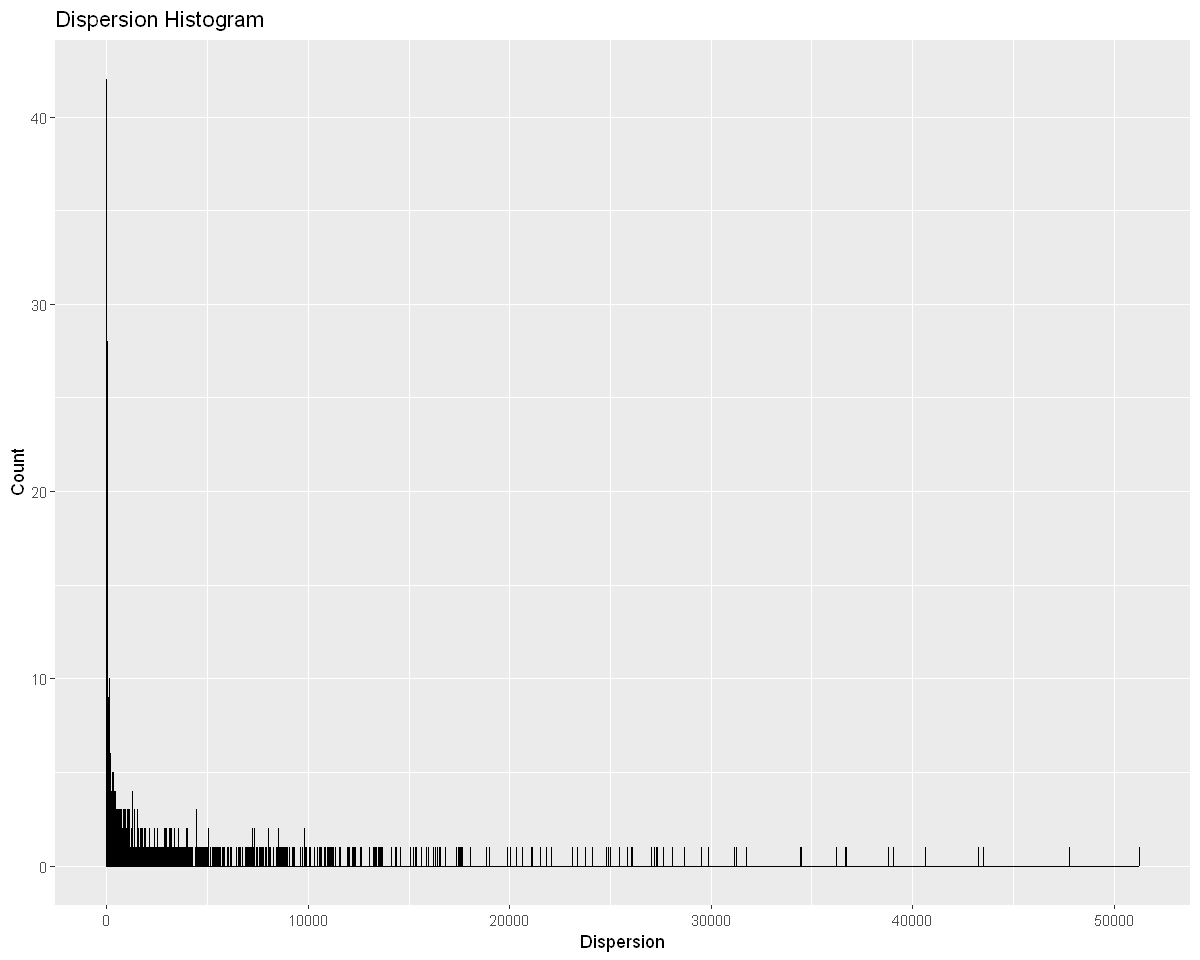

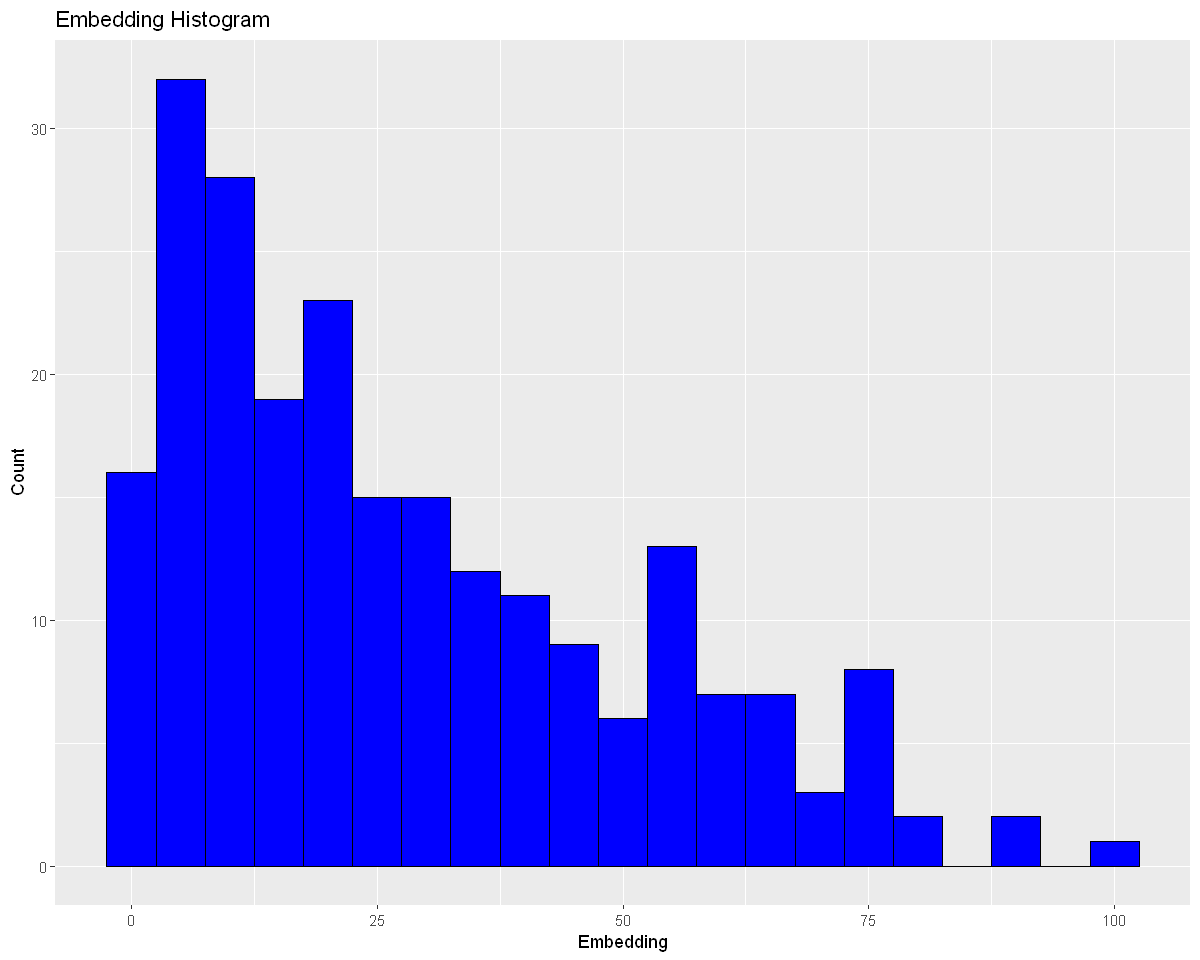

[1] 484


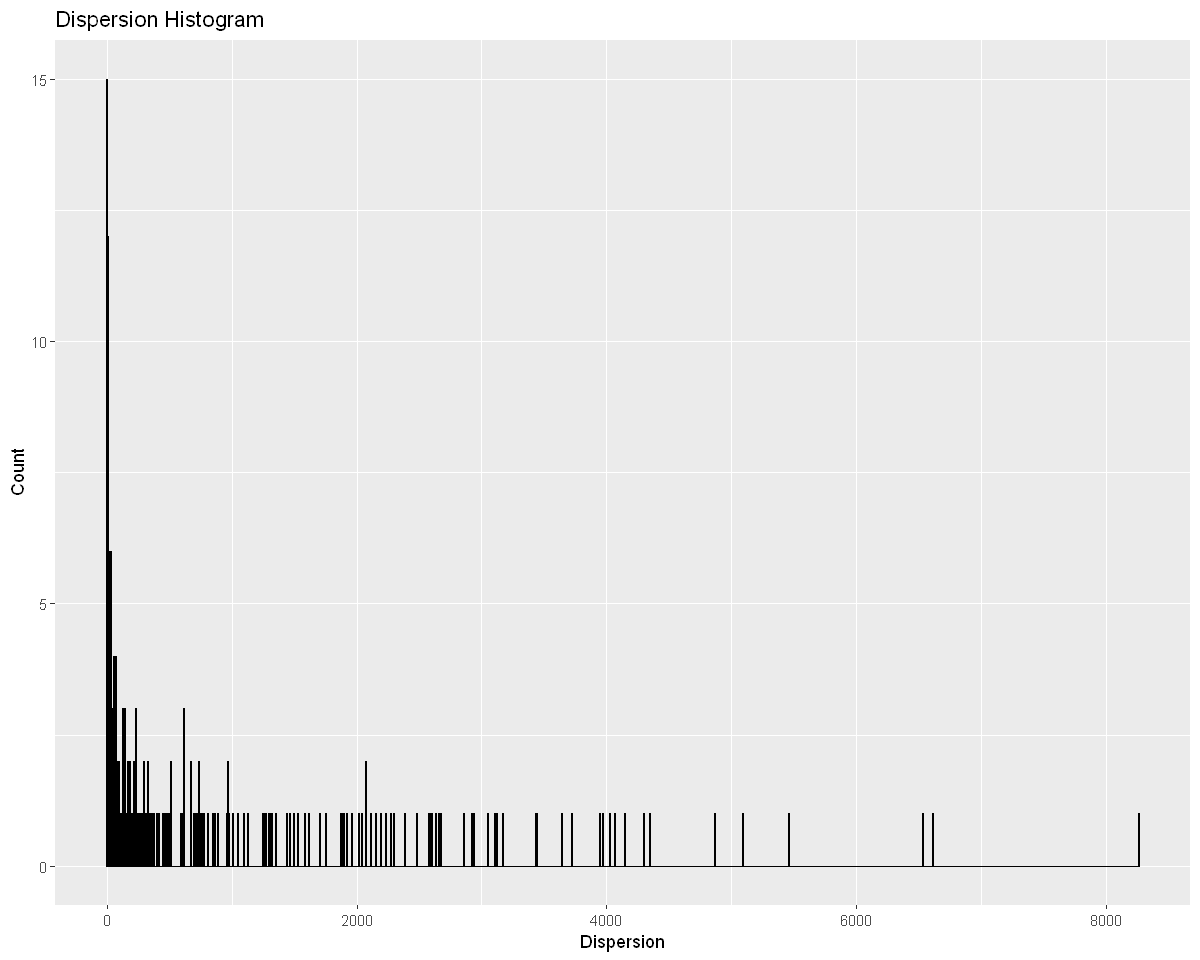

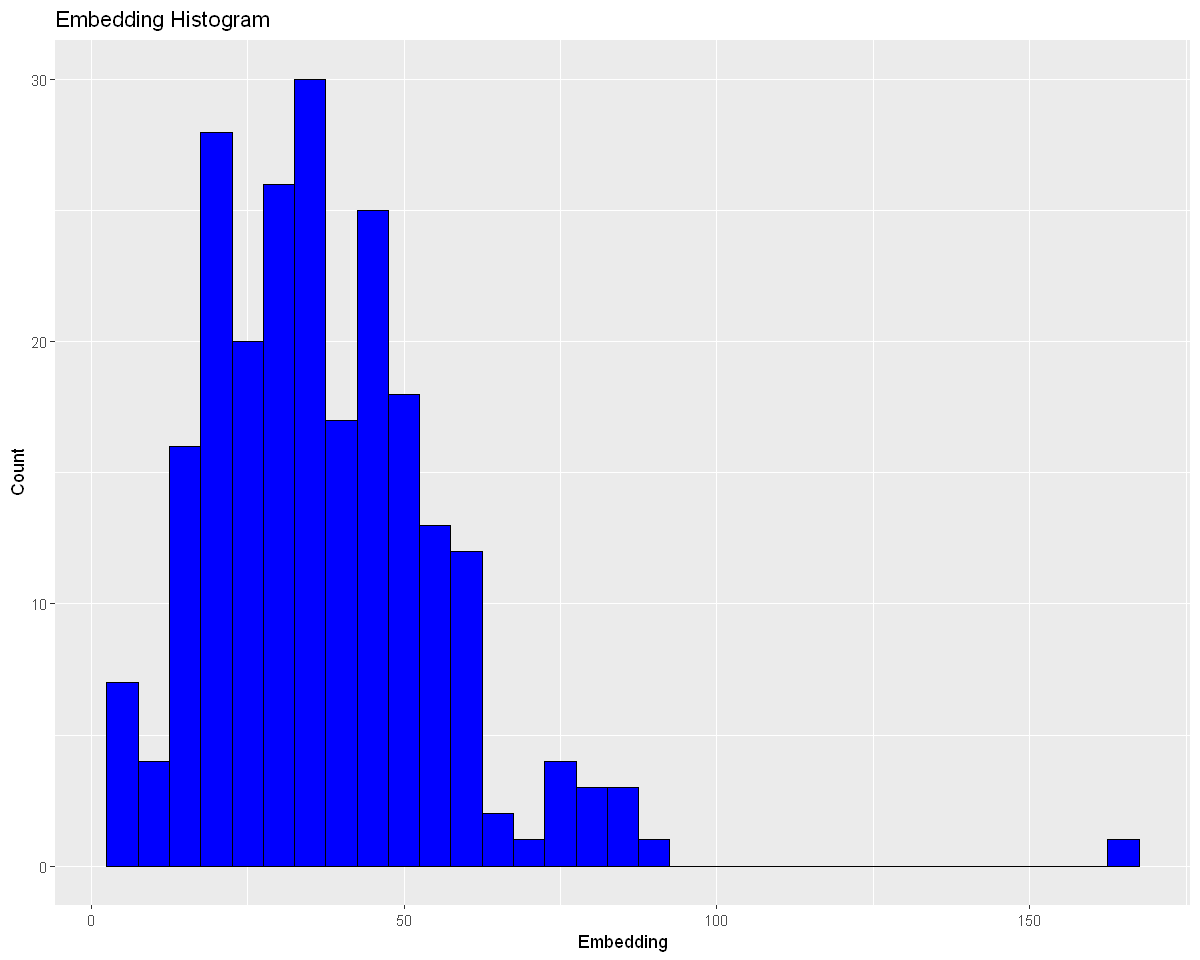

[1] 1087


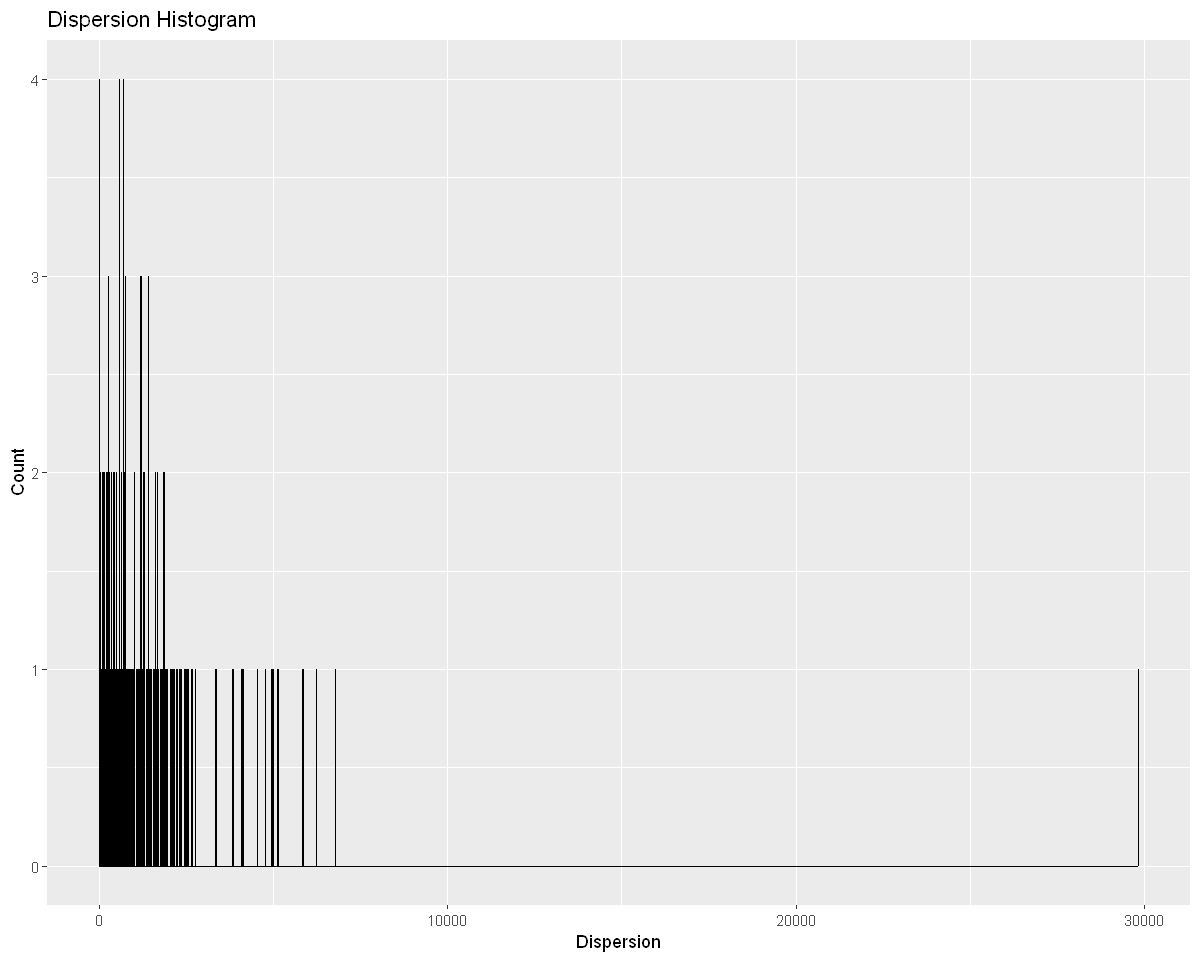

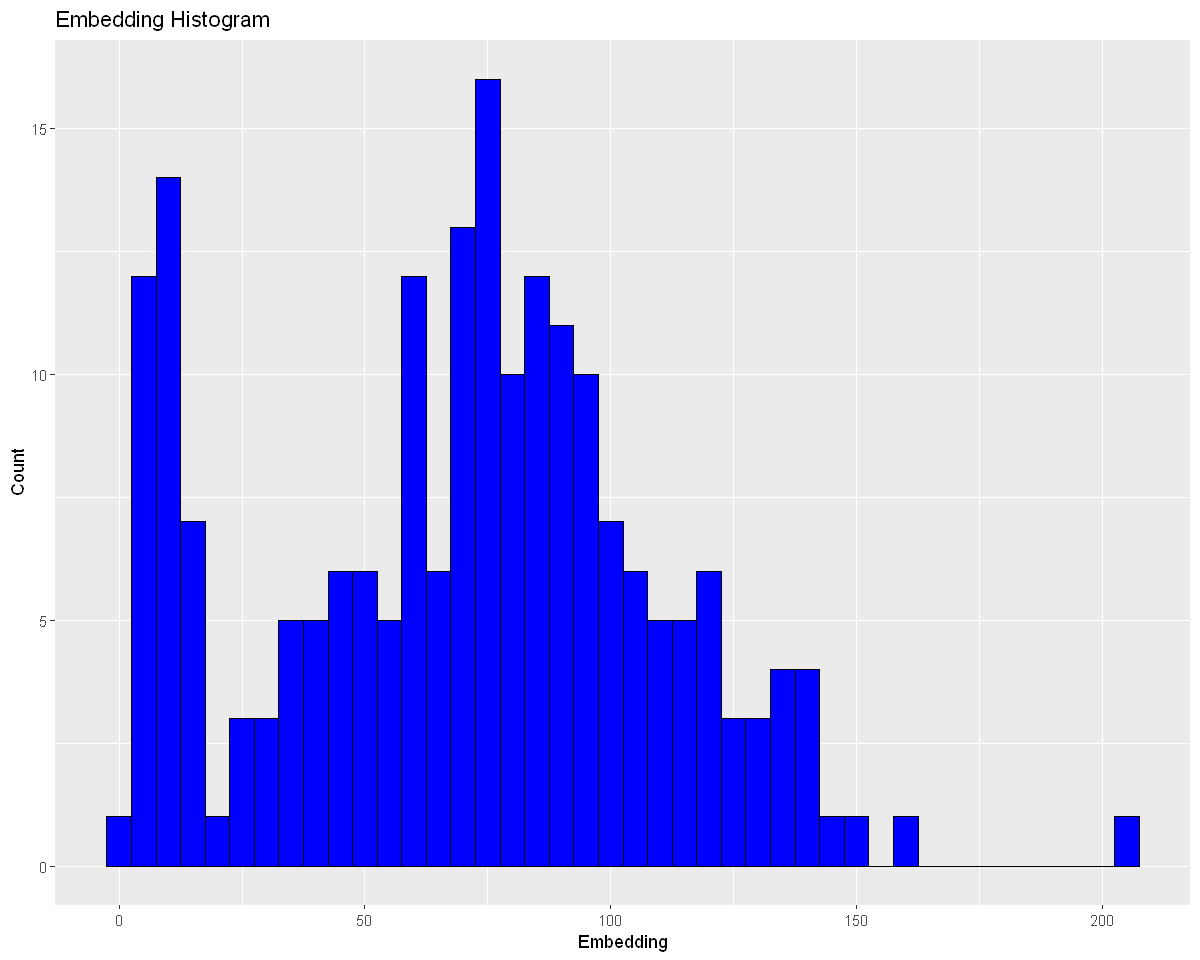

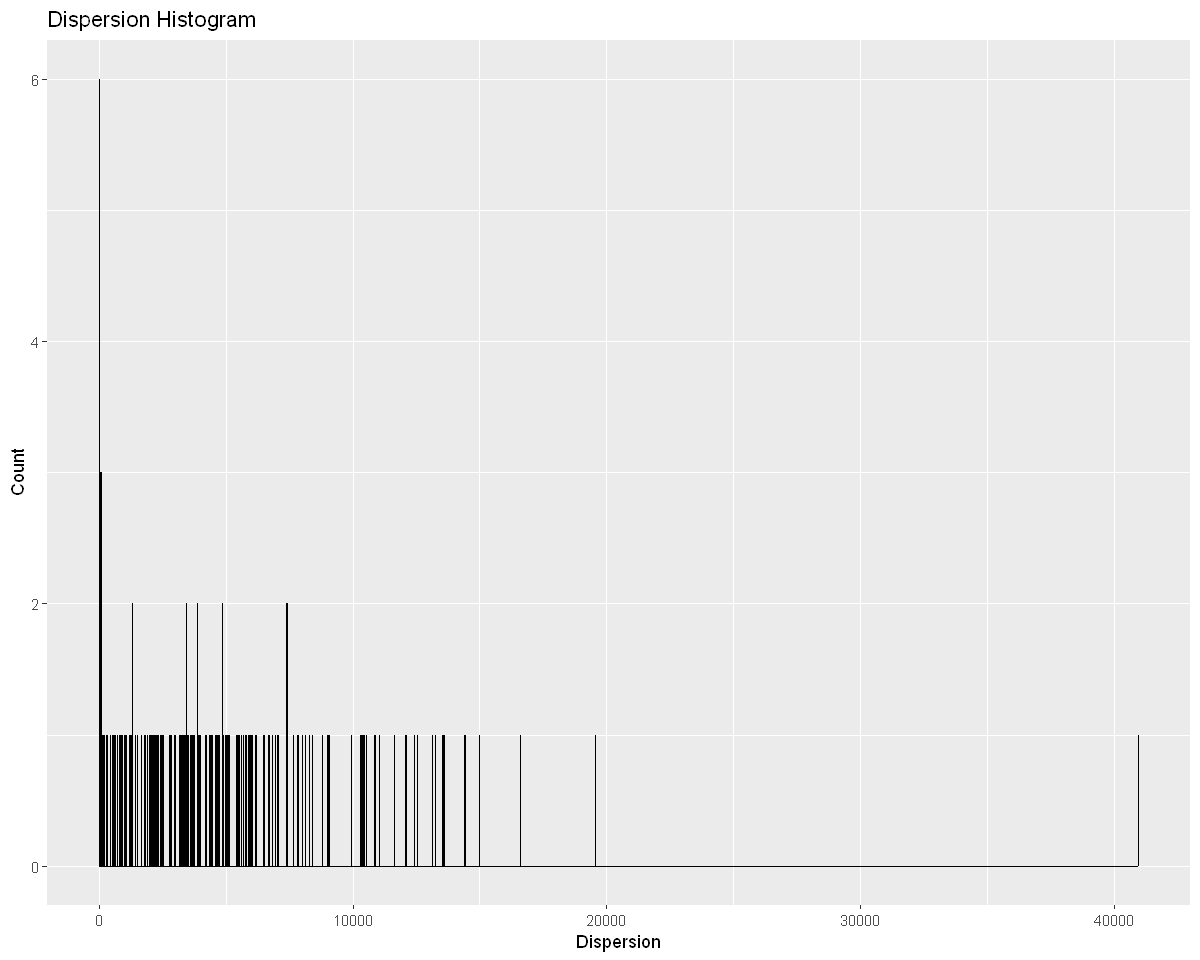

In [37]:
embd_max_node= c()
disp_max_node = c()
subgraphs = list()
layouts = list()

for (i in seq_along(node_ids)){
    corenode <- node_ids[i]
    print(corenode)
    subgraph <- get_subgraph(g_fb,corenode)
    layout=layout_with_kk(subgraph)

    embed_info <- get_embeddedness(subgraph,corenode)
    disp_info <- get_dispersion(subgraph,corenode)
    
    embed <- embed_info[[1]]
    disp <- disp_info[[1]]
    
    true_corenode <- which.max(V(subgraph)$name==corenode)
    V(subgraph)[-true_corenode]$embed <- embed
    V(subgraph)[-true_corenode]$disp <- disp
    
    
    
    embd_max_node <- c(embd_max_node,embed_info[[2]])
    disp_max_node <- c(disp_max_node,disp_info[[2]])
    subgraphs[[i]] <- subgraph
    layouts[[i]] <- layout
    
    
    filename <- paste("images\\Question12",corenode,"embed",".png",sep="_")
    p<-ggplot() + 
         geom_histogram(aes(x=embed),color="black", fill="blue",binwidth=5) +
         labs(title="Embedding Histogram") + xlab("Embedding") + ylab("Count")
    options(repr.plot.width=10, repr.plot.height=8)
    plot(p)
    dev.copy(png,filename,width = 600, height = 600)
    dev.off()

    filename <- paste("images\\Question12",corenode,"disp",".png",sep="_")
    p<-ggplot() + 
         geom_histogram(aes(x=disp),color="black", fill="blue",binwidth=5) +
         labs(title="Dispersion Histogram") + xlab("Dispersion") + ylab("Count")
    options(repr.plot.width=10, repr.plot.height=8)
    plot(p)
    dev.copy(png,filename,width = 600, height = 600)
    dev.off()
    
}

### Question 13

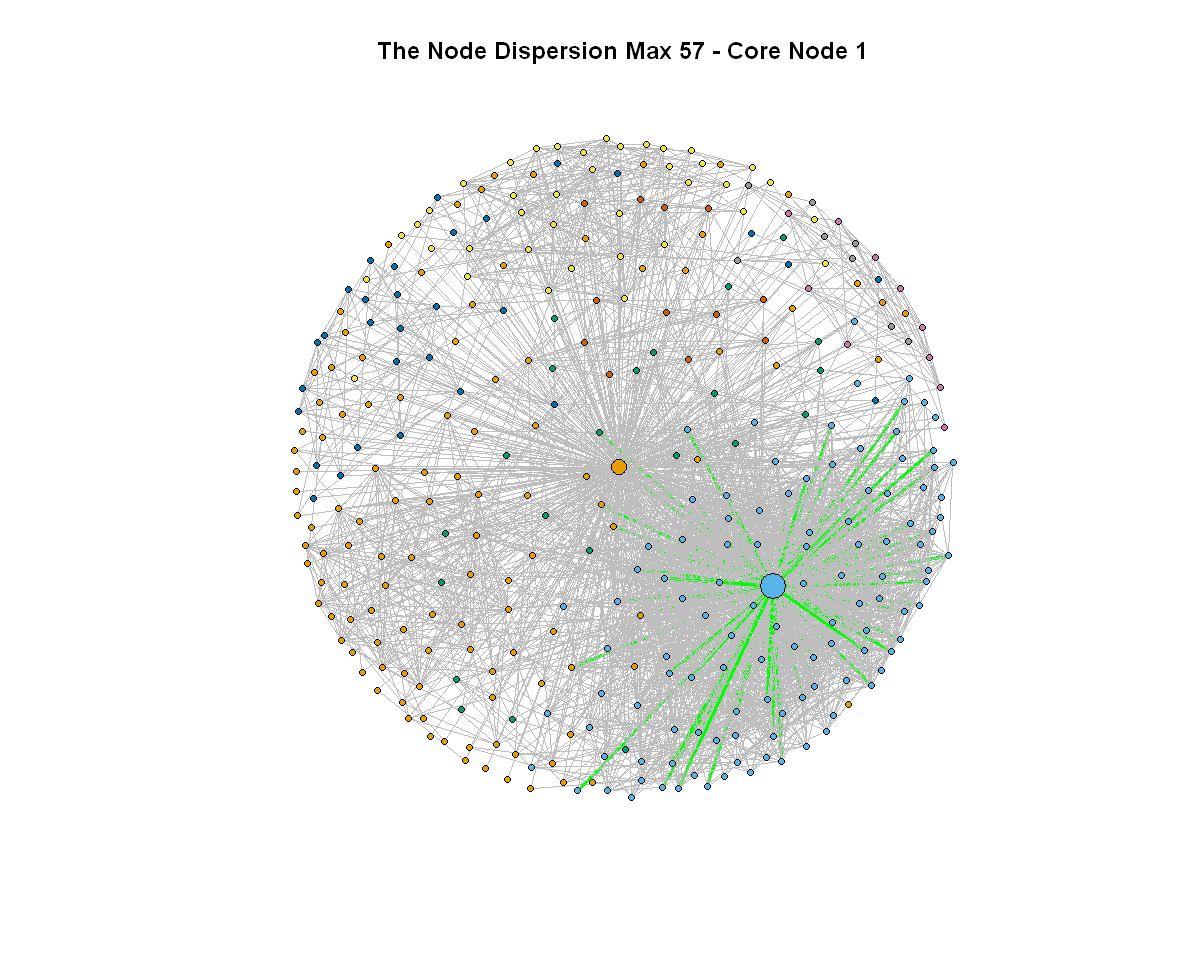

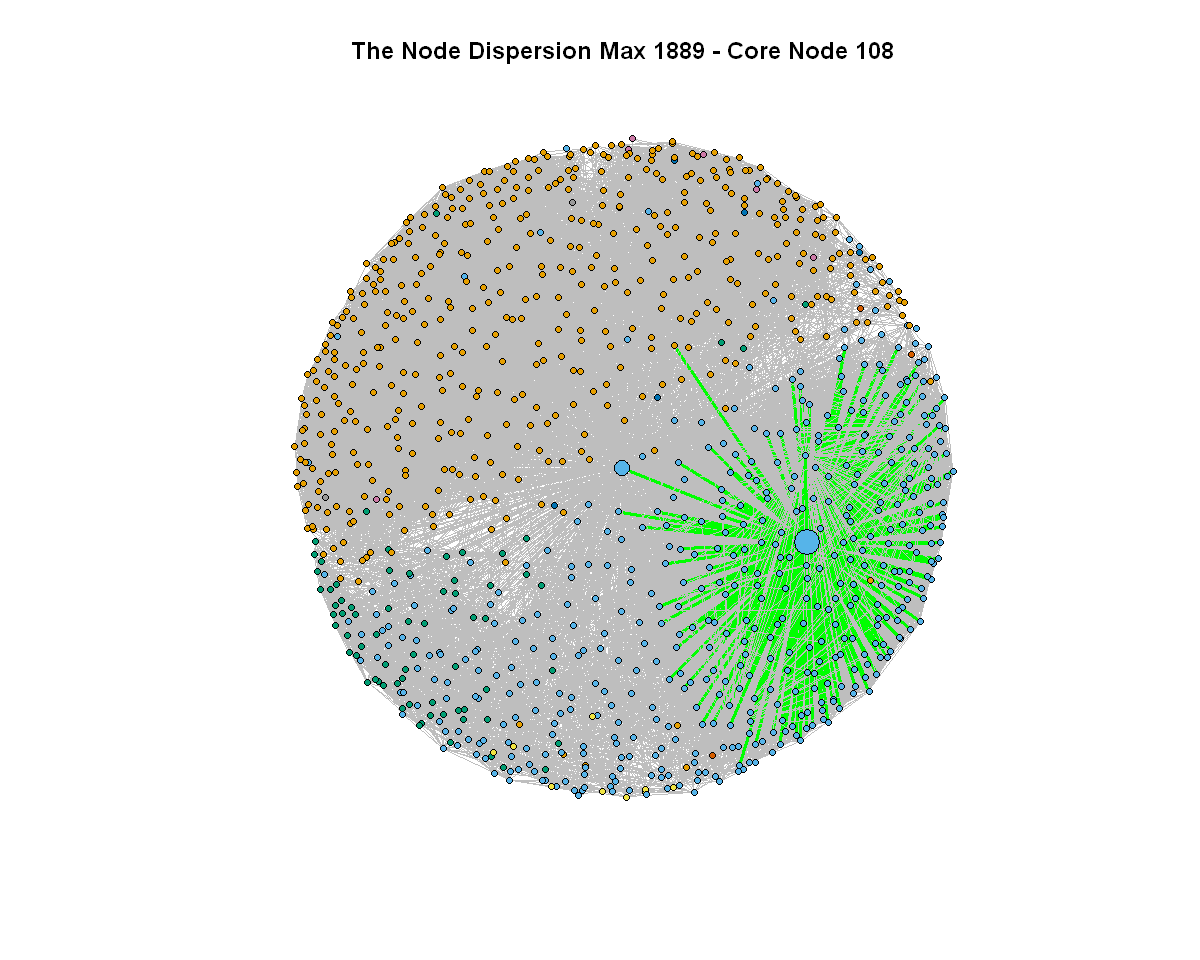

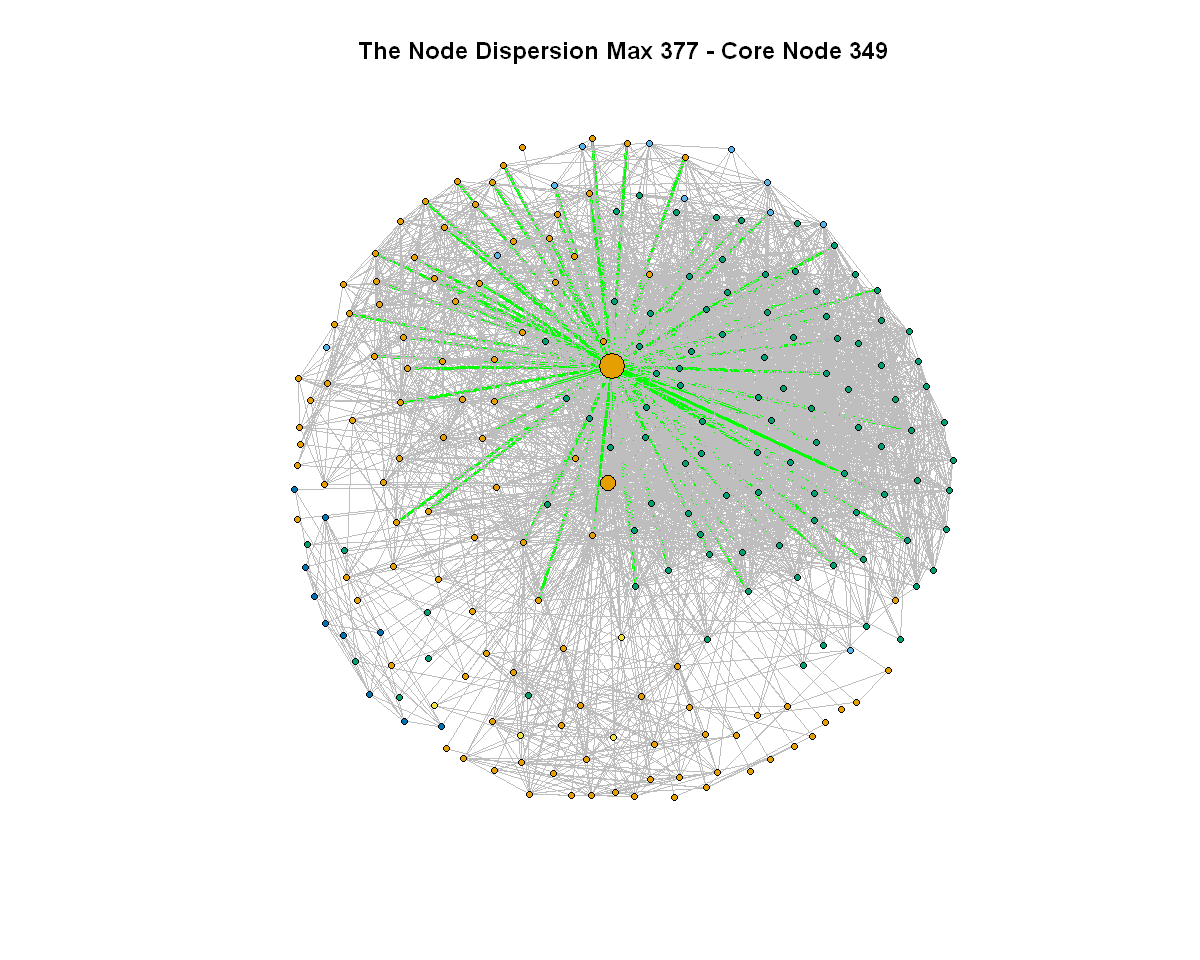

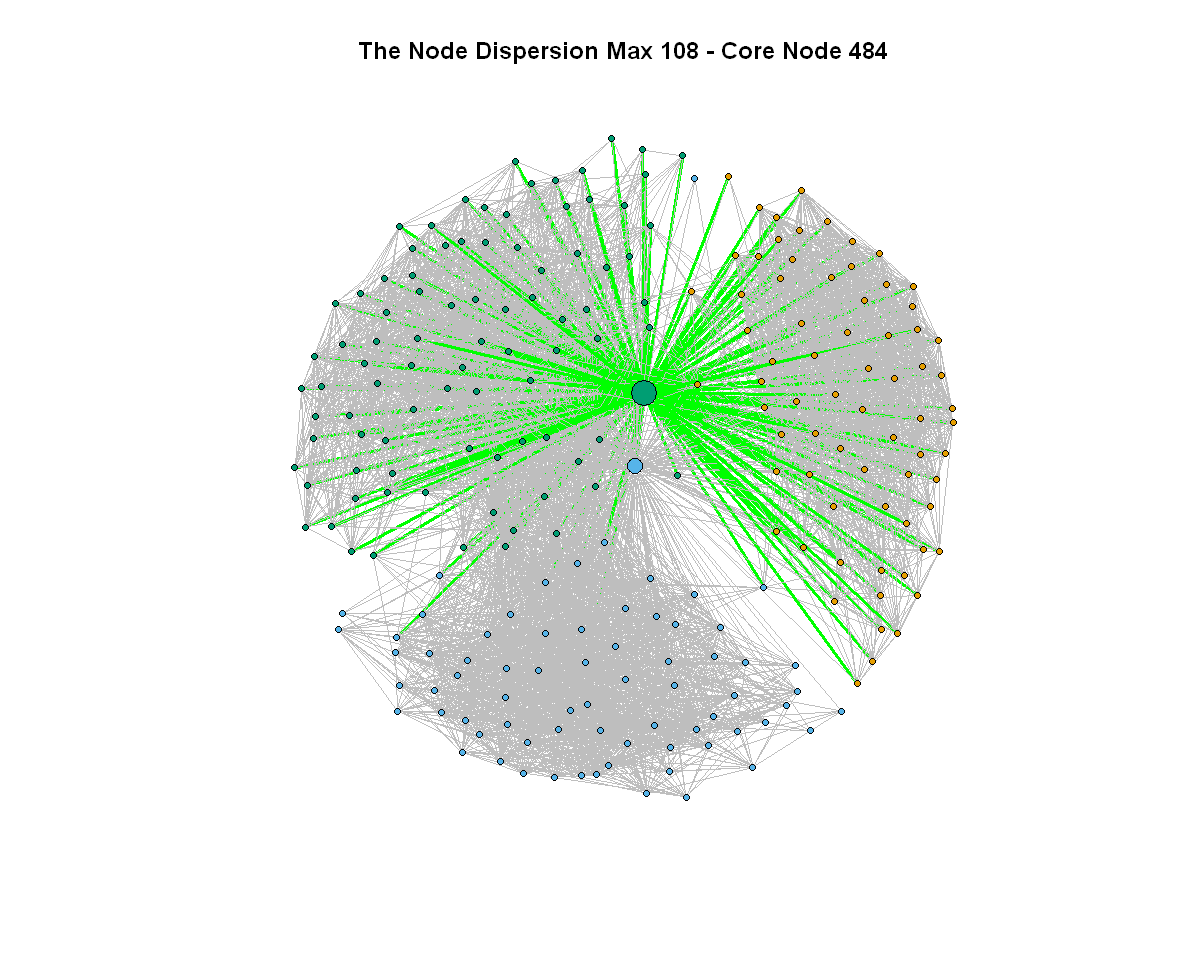

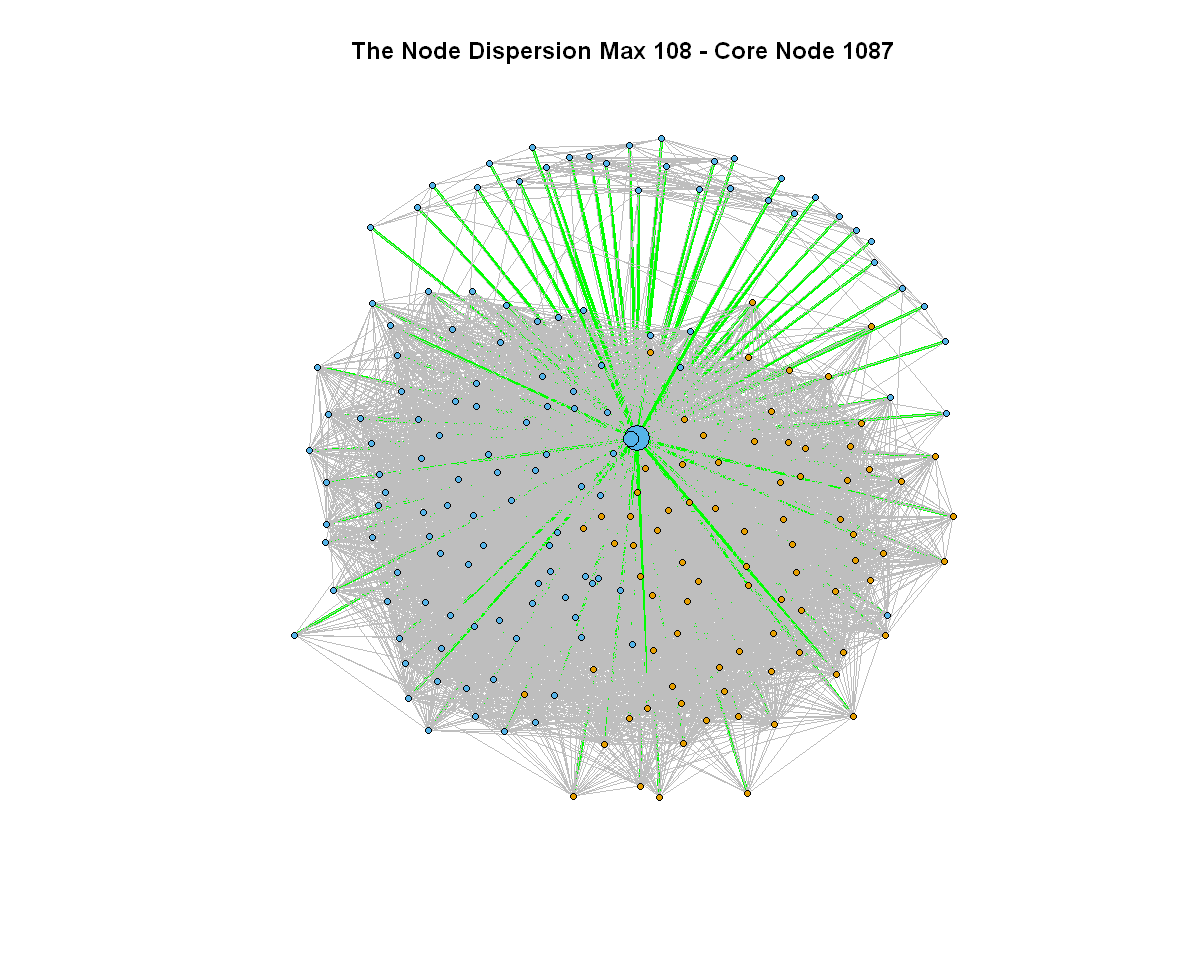

In [38]:
for (i in seq_along(node_ids)){
    subgraph <- subgraphs[[i]]
    layout <- layouts[[i]]
    
    # do the community clustering
    fg_cluster <- cluster_fast_greedy(subgraph)
    
    N_edges <- ecount(subgraph)
    edge_color <- rep("gray",N_edges)
    edge_width <- rep(0.05,N_edges)
    
    edge_list <- get.edgelist(subgraph, names=TRUE)
    incident_edges <- which(edge_list[,1] == disp_max_node[i] | edge_list[,2] == disp_max_node[i])
    edge_color[incident_edges] <- "green"
    edge_width[incident_edges] <- 3
    
    vertex_size <- rep(2,vcount(subgraph))
    vertex_size[V(subgraph)$name == disp_max_node[i]] <- 8
    vertex_size[V(subgraph)$name == node_ids[i]] <- 5
    
    
    title_string <- sprintf("The Node Dispersion Max %.0f - Core Node %0.f",disp_max_node[i],node_ids[i])
    filename <- paste("images\\Question13",node_ids[i],".png",sep="_")

    plot(subgraph,
         vertex.label = NA, 
         layout = layout,
         edge.width = edge_width, 
         edge.color = edge_color,
         vertex.size=vertex_size,
        vertex.color=fg_cluster$membership,
        main=title_string)
    dev.copy(png,filename,width = 600, height = 600)
    dev.off()
}

### Question 14

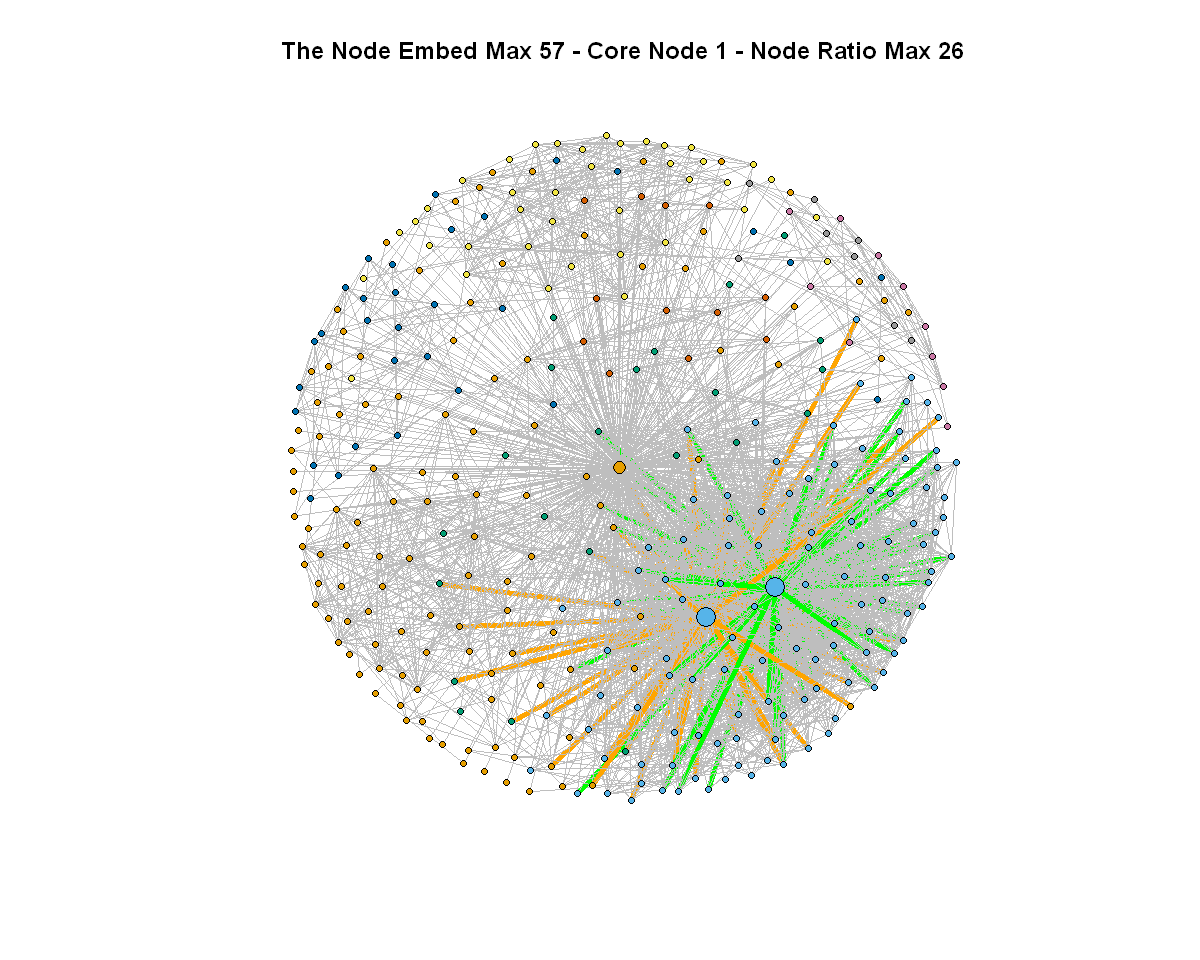

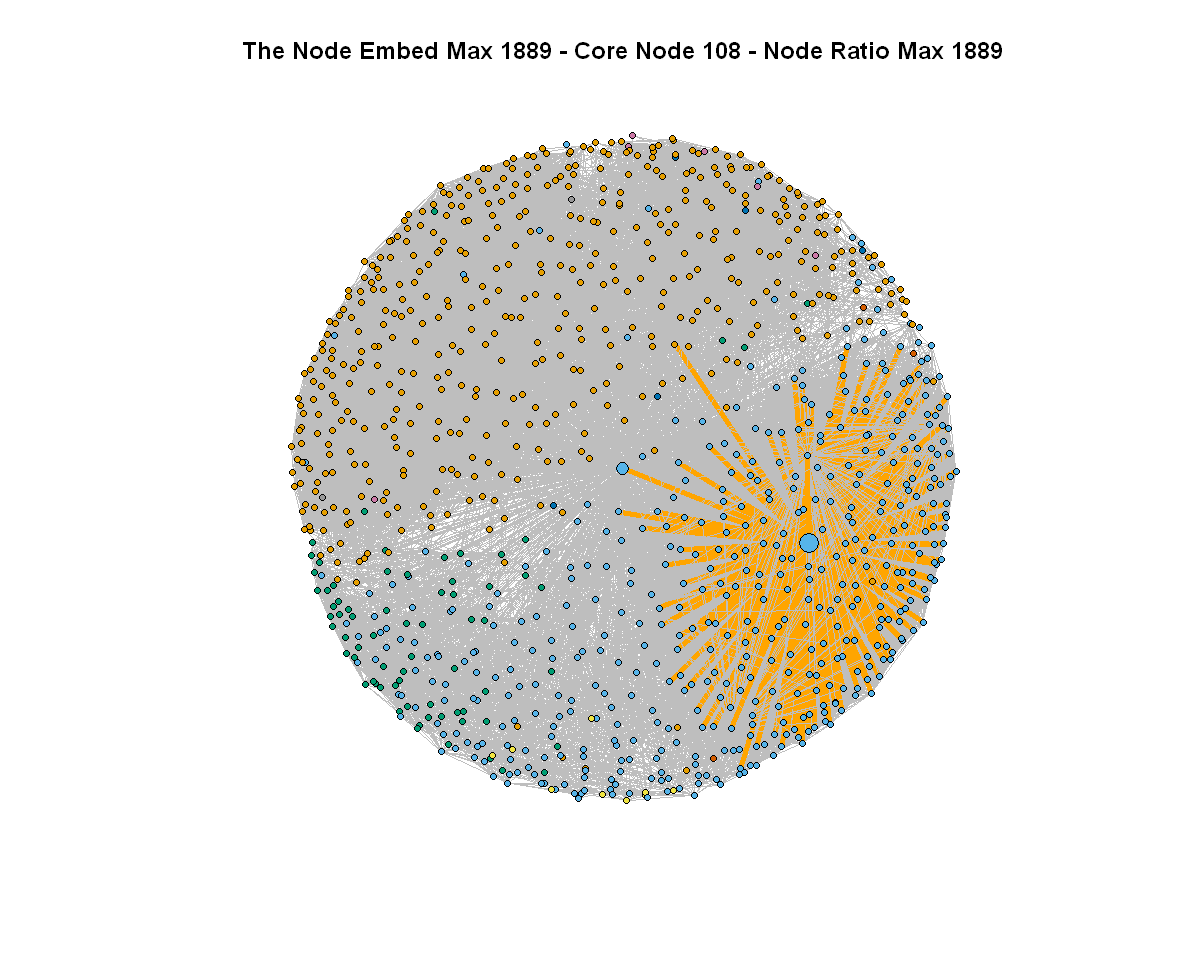

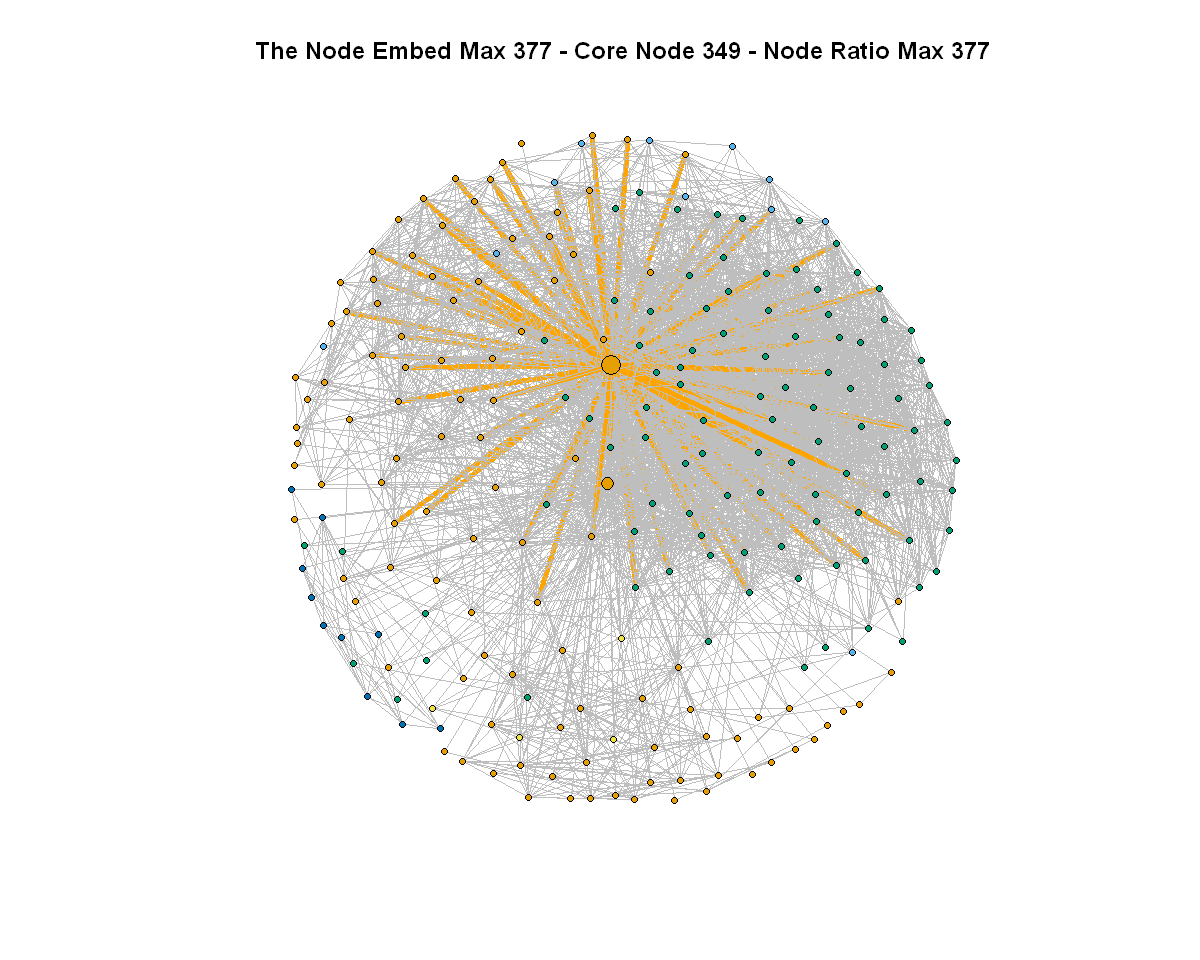

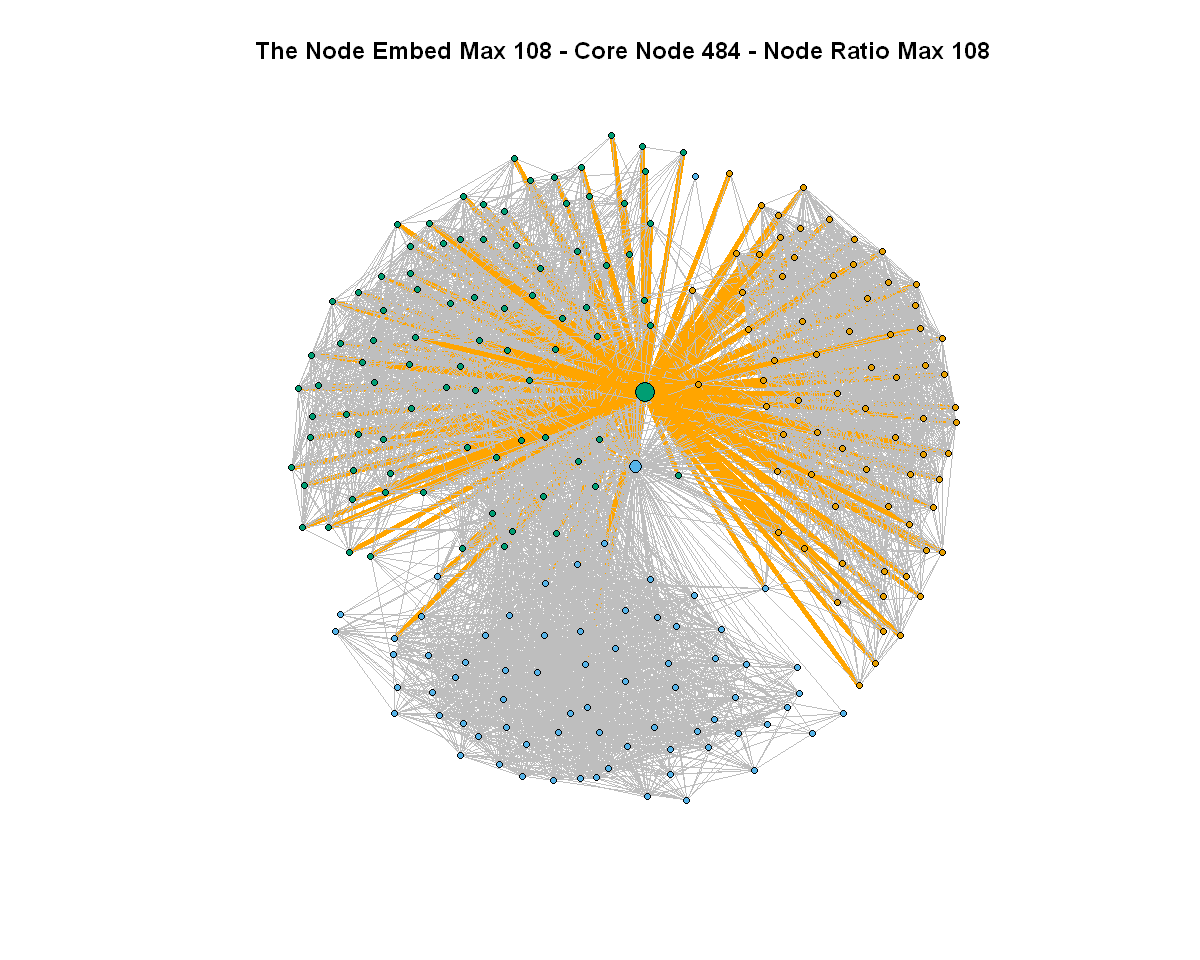

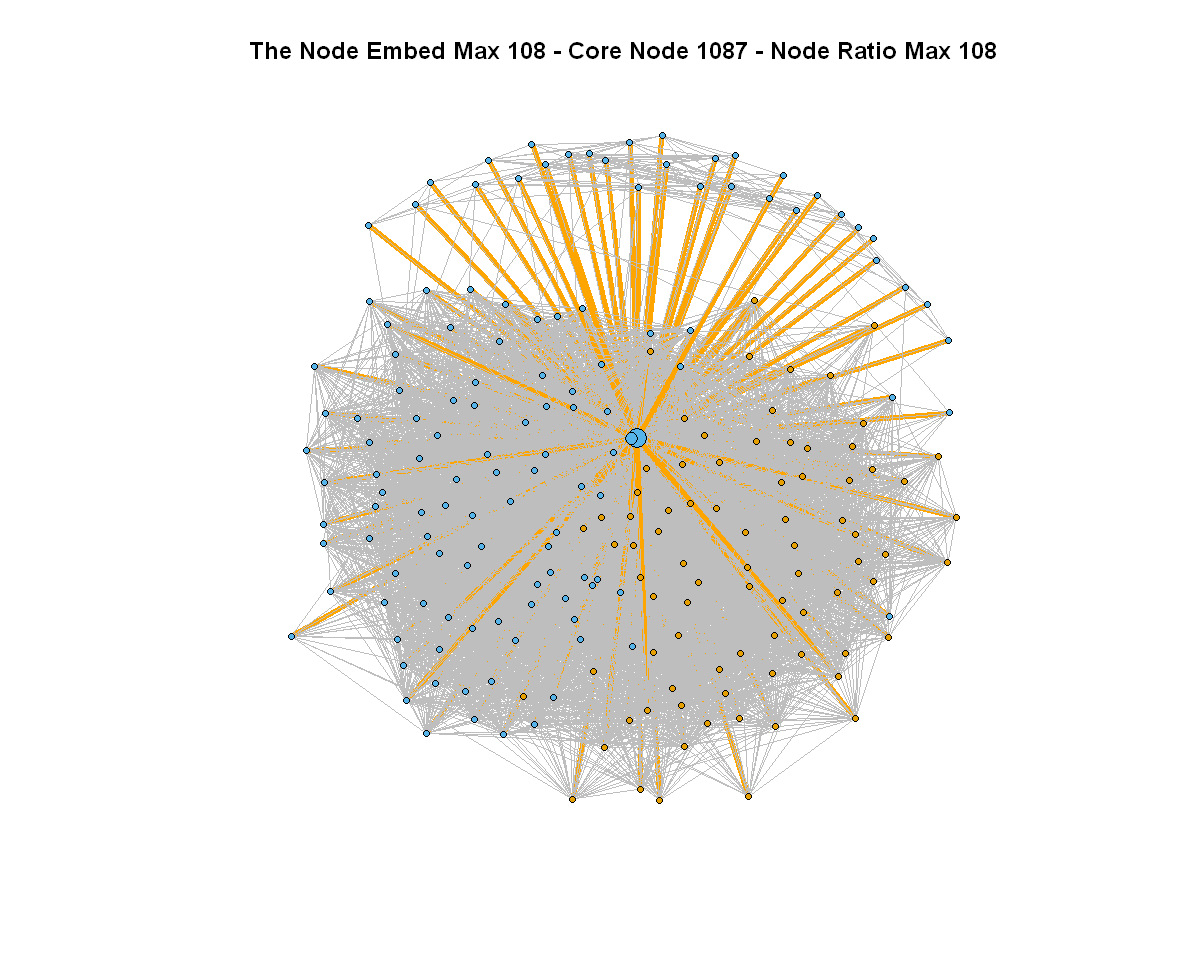

In [39]:
for (i in seq_along(node_ids)){
    subgraph <- subgraphs[[i]]
    layout <- layouts[[i]]
    
    V(subgraph)$ratio <- V(subgraph)$disp/V(subgraph)$embed
    V(subgraph)$ratio[is.infinite(V(subgraph)$ratio)] <- 0
    
    max_ratio_node <- V(subgraph)$name[which.max(V(subgraph)$ratio)]
    
    # do the community clustering
    fg_cluster <- cluster_fast_greedy(subgraph)
    
    N_edges <- ecount(subgraph)
    edge_color <- rep("gray",N_edges)
    edge_width <- rep(0.05,N_edges)
    
    edge_list <- get.edgelist(subgraph, names=TRUE)
    incident_edges_embd <- which(edge_list[,1] == embd_max_node[i] | 
                            edge_list[,2] == embd_max_node[i])
    edge_color[incident_edges_embd] <- "green"
    edge_width[incident_edges_embd] <- 4
    
    incident_edges_ratio <- which(edge_list[,1] == max_ratio_node |
                            edge_list[,2] == max_ratio_node)
    edge_color[incident_edges_ratio] <- 'orange'
    edge_width[incident_edges_ratio] <- 4
    
    vertex_size <- rep(2,vcount(subgraph))
    vertex_size[V(subgraph)$name == embd_max_node[i]] <- 6
    vertex_size[V(subgraph)$name == node_ids[i]] <- 4
    vertex_size[V(subgraph)$name == max_ratio_node] <- 6
    
    title_string <- sprintf("The Node Embed Max %.0f - Core Node %0.f - Node Ratio Max %.0f",embd_max_node[i],node_ids[i],max_ratio_node)
    filename <- paste("images\\Question14",node_ids[i],".png",sep="_")

    plot(subgraph,
         vertex.label = NA, 
         layout = layout,
         edge.width = edge_width, 
         edge.color = edge_color,
         vertex.size=vertex_size,
        vertex.color=fg_cluster$membership,
        main=title_string)
    dev.copy(png,filename,width = 600, height = 600)
    dev.off()
}

### Question 15

### Question 16

In [14]:
g_friend <- get_subgraph(g_fb,415)

In [15]:
Nr <- V(g_friend)$name[degree(g_friend) == 24]

In [16]:
Nr_size <- length(Nr)
cat("The length of the list Nr is",Nr_size)

The length of the list Nr is 11

### Question 17

In [17]:
common_neighbors <- function(g,ids){
    l <- as.matrix(degree(g,ids))
    numerator <- (do.call(rbind, replicate(length(l), t(l), simplify=FALSE)) + do.call(cbind, replicate(length(l), l, simplify=FALSE)))/2
    return(similarity.dice(g,ids) * numerator)
}

In [18]:
adamic_measure = function(g, v1, v2){
    shared = intersect(neighbors(g, v1), neighbors(g, v2))
    score = 0
    for(node in shared){
        n = neighbors(g, node)
        score = score + (1/log(length(n)))
    }
    return(score)
}

In [38]:
result_jaccard <- 0
result_common <- 0
result_adamic <- 0

for (i in seq_along(Nr)){
    focus_node <- Nr[i]
    focus_node_idx <- which.max(V(g_friend)$name == focus_node)
    
    avg_accuracy_jaccard <- 0
    avg_accuracy_common <- 0
    avg_accuracy_adamic <- 0

    for (j in seq_len(10)){
        
        neighbor_list <- neighbors(g_friend,focus_node_idx)
        two_hop_graph <- ego(g_friend,order=2,focus_node_idx)[[1]]

        drop_nodes <- as.vector(rand(length(neighbor_list),1) <= .25)
        edges <- paste(focus_node,neighbor_list[drop_nodes]$name,sep="|")
        friends_deleted <- neighbor_list[drop_nodes]
        friends_keep <- neighbor_list[!drop_nodes]
        g_friendless <- delete_edges(g_friend,edges)

        potential_recommendations <- difference(two_hop_graph,friends_keep)
        
        jaccard_ <- similarity.jaccard(g_friendless,as_ids(potential_recommendations))
        common_ <- common_neighbors(g_friendless,as_ids(potential_recommendations))
        adamic_ <- matrix(nrow=1,ncol=length(potential_recommendations))
        for (j in seq_along(potential_recommendations)){
            adamic_[1,j] <- adamic_measure(g_friendless,as.character(focus_node),as_ids(potential_recommendations[j]))
        }
        
        
        friend_rank_jaccard <- rev(order(jaccard_[as_ids(potential_recommendations) == as.character(focus_node)]))
        friend_rank_adamic <- rev(order(adamic_))
        friend_rank_common <- rev(order(common_[as_ids(potential_recommendations) == as.character(focus_node)]))

        friends_recommended_jaccard <- potential_recommendations[as.vector(friend_rank_jaccard)][2:(length(friends_deleted)+1)]
        friends_recommended_adamic <- potential_recommendations[as.vector(friend_rank_adamic)][2:(length(friends_deleted)+1)]
        friends_recommended_common <- potential_recommendations[as.vector(friend_rank_common)][2:(length(friends_deleted)+1)]

        accuracy_jaccard <- length(intersect(friends_deleted,friends_recommended_jaccard)) / length(friends_deleted)
        accuracy_adamic <- length(intersect(friends_deleted,friends_recommended_adamic)) / length(friends_deleted)
        accuracy_common <- length(intersect(friends_deleted,friends_recommended_common)) / length(friends_deleted)
        
        avg_accuracy_jaccard <- avg_accuracy_jaccard + accuracy_jaccard
        avg_accuracy_adamic <- avg_accuracy_adamic + accuracy_adamic
        avg_accuracy_common <- avg_accuracy_common + accuracy_common

        
    }

    result_jaccard <- result_jaccard + avg_accuracy_jaccard/10
    result_adamic <- result_adamic + avg_accuracy_adamic/10
    result_common <- result_common + avg_accuracy_common/10
}
cat(result_jaccard / Nr_size,result_adamic / Nr_size,result_common / Nr_size)

0.8261698 0.7255529 0.7304303